# **Name:** Saail D. Tayshete
# **College:** CHRIST( Deemed to be University), Bangalore Yeshwantpur campus

# **Case Study 1 : Predicting Insurance Claim Severity**

## **Importing neccesary libraries**

In [155]:
# Data manipulation and numerical operations
import pandas as pd
import numpy as np
from datetime import datetime

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and feature engineering
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model selection and evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Machine learning models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Statistical tests and analysis
from scipy.stats import pearsonr, spearmanr, kruskal, boxcox, skew, f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [66]:
df = pd.read_csv("/content/insurance_dataset.csv")

## **EDA**

In [67]:
# Shape of dataset
df.shape

(1010000, 16)

In [68]:
df.head()

,policy_id,cust_age,insured_sex,cust_region,coverage_start_date,claim_incurred_date,ins_deductible,production_year,car_brand,num_prev_claims,claim_type,bodily_injuries,zip_code,annual_prem,injury_claim,property_claim
0,P000000000,44.0,F,Suburban,2024-04-03,2024-04-03,500.0,2003.0,Ford,1.0,Injury,1.0,91482.0,930.247147,358.153316,549.289019
1,P000000001,63.0,Female,Suburban,2024-08-15,2024-08-15,1000.0,1992.0,Ford,0.0,Collision,0.0,91482.0,1478.210171,107.042979,5932.415394
2,P000000002,NaN,Male,Urban,2023-12-25,2023-12-25,NaN,NaN,BMW,NaN,Theft,NaN,63772.0,NaN,NaN,NaN
3,P000000003,37.0,Male,Suburban,2022-05-19,2022-05-19,500.0,2008.0,Toyota,0.0,Collision,0.0,91482.0,1362.939249,535.592913,2097.988691
4,P000000004,54.0,Male,Suburban,2023-08-01,2023-08-24,500.0,1999.0,Toyota,2.0,collision,0.0,63772.0,3697.230332,435.746725,3945.244397


In [69]:
# Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010000 entries, 0 to 1009999
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   policy_id            1010000 non-null  object 
 1   cust_age             960005 non-null   float64
 2   insured_sex          989819 non-null   object 
 3   cust_region          959470 non-null   object 
 4   coverage_start_date  960004 non-null   object 
 5   claim_incurred_date  959960 non-null   object 
 6   ins_deductible       960007 non-null   float64
 7   production_year      960023 non-null   float64
 8   car_brand            959508 non-null   object 
 9   num_prev_claims      960037 non-null   float64
 10  claim_type           959482 non-null   object 
 11  bodily_injuries      960012 non-null   float64
 12  zip_code             959520 non-null   float64
 13  annual_prem          960026 non-null   float64
 14  injury_claim         959524 non-null   float64
 15

In [70]:
df.describe()

,cust_age,ins_deductible,production_year,num_prev_claims,bodily_injuries,zip_code,annual_prem,injury_claim,property_claim
count,960005.000000,960007.000000,960023.000000,960037.000000,960012.000000,959520.000000,960026.000000,9.595240e+05,9.595240e+05
mean,40.613863,992.712032,2005.761219,1.093878,0.545130,57145.194684,2090.716276,3.372695e+03,4.430990e+03
std,15.194444,699.950013,8.898541,1.351661,0.832458,27541.879684,2038.956277,1.248487e+04,9.348525e+03
min,-10.000000,500.000000,1966.000000,0.000000,0.000000,10649.000000,381.187548,2.865850e-01,4.906210e+00
25%,29.000000,500.000000,2000.000000,0.000000,0.000000,35526.000000,1193.115926,2.981936e+02,8.132062e+02
50%,40.000000,1000.000000,2006.000000,1.000000,0.000000,56379.000000,1857.889685,8.875361e+02,1.924313e+03
75%,50.000000,1000.000000,2012.000000,2.000000,1.000000,83311.000000,2536.320181,2.657710e+03,4.576635e+03
max,138.000000,5000.000000,2048.000000,10.000000,5.000000,99333.000000,20000.000000,2.431986e+06,1.452176e+06


# **Dealing with Missing values**

In [71]:
# Number of null values in each column
df.isnull().sum()

,0
policy_id,0
cust_age,49995
insured_sex,20181
cust_region,50530
coverage_start_date,49996
claim_incurred_date,50040
ins_deductible,49993
production_year,49977
car_brand,50492
num_prev_claims,49963


#### Getting the percentage of null values in column

In [72]:
# Calculate the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Display the result as a DataFrame for better readability
missing_percentage_df = pd.DataFrame(missing_percentage, columns=['Missing Percentage'])
missing_percentage_df = missing_percentage_df.sort_values(by='Missing Percentage', ascending=False)

# Print the result
print("Percentage of missing values in each column:\n")
print(missing_percentage_df)

Percentage of missing values in each column:

                     Missing Percentage
cust_region                    5.002970
claim_type                     5.001782
car_brand                      4.999208
zip_code                       4.998020
injury_claim                   4.997624
property_claim                 4.997624
claim_incurred_date            4.954455
coverage_start_date            4.950099
cust_age                       4.950000
ins_deductible                 4.949802
bodily_injuries                4.949307
production_year                4.948218
annual_prem                    4.947921
num_prev_claims                4.946832
insured_sex                    1.998119
policy_id                      0.000000


*   Most columns have around 5% missing values, which is a moderate amount.  This level of missingness is manageable and doesn’t warrant dropping entire columns, as that would result in losing valuable features.
* Imputing the missing values with median.



In [73]:
# 1. Numerical columns: Impute with median
numerical_cols = ['cust_age', 'ins_deductible', 'production_year', 'num_prev_claims',
                  'bodily_injuries', 'zip_code', 'annual_prem', 'injury_claim', 'property_claim']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# 2. Categorical columns: Impute with mode
categorical_cols = ['insured_sex', 'cust_region', 'car_brand', 'claim_type']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# 3. Date columns: Convert to datetime and impute with median date
date_cols = ['coverage_start_date', 'claim_incurred_date']
for col in date_cols:
    # Convert to datetime
    df[col] = pd.to_datetime(df[col], errors='coerce')
    # Impute with median date
    median_date = df[col].median()
    df[col] = df[col].fillna(median_date)

In [74]:
# Verify that there are no more missing values in the imputed columns
print("Missing values after imputation:\n")
print(df.isnull().sum())

Missing values after imputation:

policy_id              0
cust_age               0
insured_sex            0
cust_region            0
coverage_start_date    0
claim_incurred_date    0
ins_deductible         0
production_year        0
car_brand              0
num_prev_claims        0
claim_type             0
bodily_injuries        0
zip_code               0
annual_prem            0
injury_claim           0
property_claim         0
dtype: int64


# **Dealing with outliers**

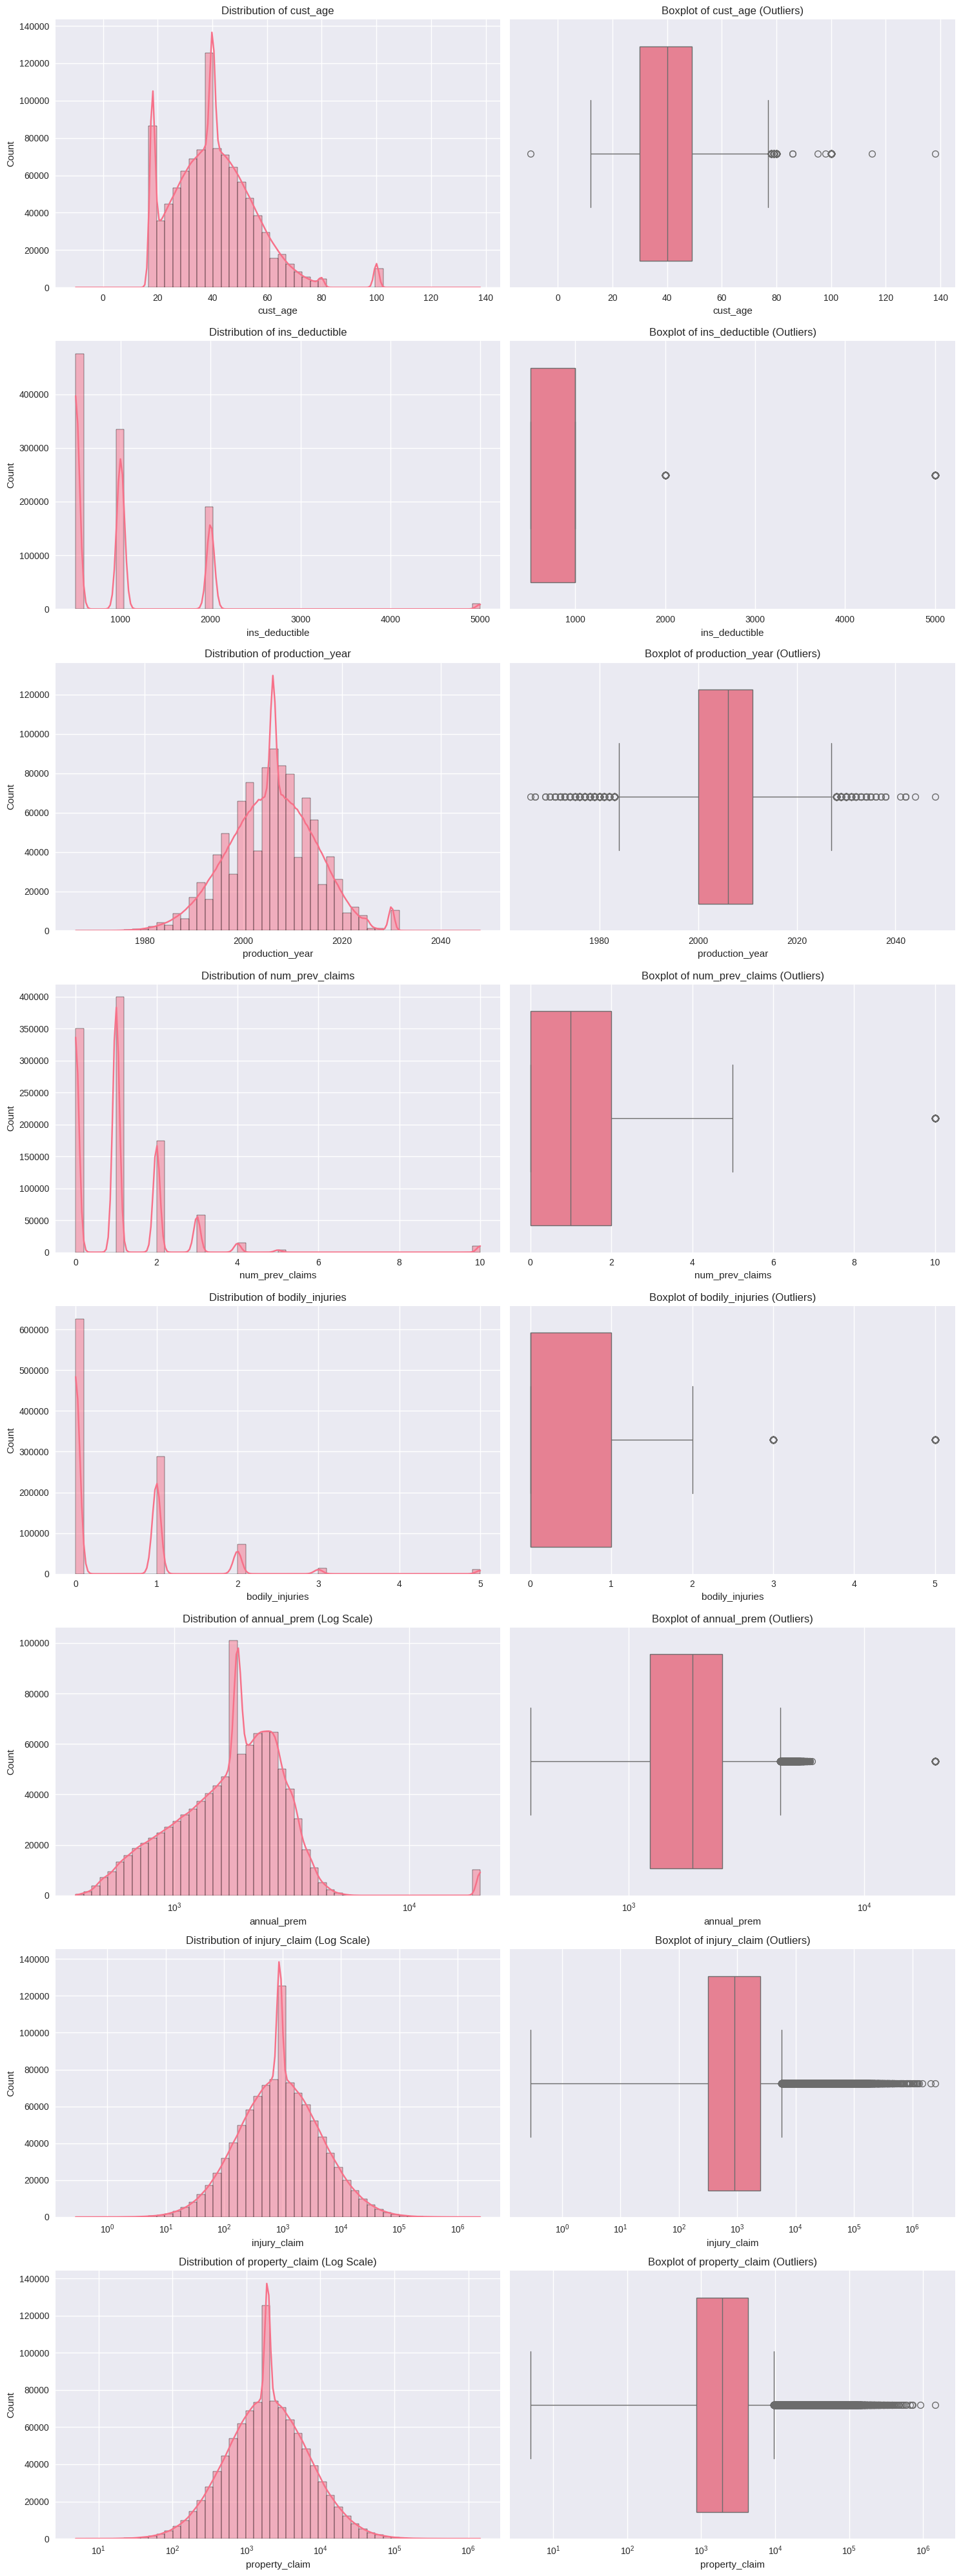

In [75]:
# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Define numerical columns
numerical_cols = ['cust_age', 'ins_deductible', 'production_year', 'num_prev_claims',
                  'bodily_injuries', 'annual_prem', 'injury_claim', 'property_claim']

# Set up the subplot grid: 2 plots per column (histogram and boxplot), 9 columns
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=2, figsize=(15, 5 * len(numerical_cols)))

# Iterate over each numerical column
for idx, col in enumerate(numerical_cols):
    # Histogram (left subplot)
    ax_hist = axes[idx, 0]
    if col in ['injury_claim', 'property_claim', 'annual_prem']:
        # Use log scale for columns with heavy tails
        sns.histplot(df[col], bins=50, kde=True, ax=ax_hist, log_scale=True)
        ax_hist.set_title(f'Distribution of {col} (Log Scale)')
    else:
        # Regular scale for other columns
        sns.histplot(df[col], bins=50, kde=True, ax=ax_hist)
        ax_hist.set_title(f'Distribution of {col}')
    ax_hist.set_xlabel(col)
    ax_hist.set_ylabel('Count')

    # Boxplot (right subplot)
    ax_box = axes[idx, 1]
    sns.boxplot(x=df[col], ax=ax_box)
    ax_box.set_title(f'Boxplot of {col} (Outliers)')
    if col in ['injury_claim', 'property_claim', 'annual_prem']:
        ax_box.set_xscale('log')  # Use log scale for better visualization of outliers
    ax_box.set_xlabel(col)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Domain based approach

In [76]:
# Define domain-based rules for outlier detection
def detect_and_handle_outliers_domain(df):
    # Copy the DataFrame to avoid modifying the original
    df_cleaned = df.copy()

    # Define rules for the specified columns
    rules = {
        'cust_age': (18, 80),
        'production_year': (2000, 2025),
        'injury_claim': (0, float('inf')),
        'property_claim': (0, float('inf')),
    }

    # Dictionary to store outliers
    outliers_dict = {}

    # Detect and handle outliers
    for col, rule in rules.items():
        if col in ['injury_claim', 'property_claim']:
            # For claims, ensure non-negative
            outliers = df_cleaned[df_cleaned[col] < rule[0]][col]
            outliers_dict[col] = outliers
            # Replace negative values with 0
            df_cleaned[col] = df_cleaned[col].clip(lower=0)
        else:
            # For cust_age and production_year, check if outside the range
            outliers = df_cleaned[(df_cleaned[col] < rule[0]) | (df_cleaned[col] > rule[1])][col]
            outliers_dict[col] = outliers
            # Cap values at the defined bounds
            df_cleaned[col] = df_cleaned[col].clip(lower=rule[0], upper=rule[1])

    # Print summary of outliers
    for col, outliers in outliers_dict.items():
        print(f"\nOutliers in {col} (Domain Knowledge):")
        print(f"Number of outliers: {len(outliers)}")
        if len(outliers) > 0:
            print(f"Sample outliers: {outliers.head().values}")
        else:
            print("No outliers detected.")

    # Verify the changes by checking the range of each column
    print("\nSummary of columns after handling outliers:")
    for col in rules.keys():
        print(f"\n{col}:")
        print(f"Min: {df_cleaned[col].min()}")
        print(f"Max: {df_cleaned[col].max()}")

    return df_cleaned

# Apply the function to detect and handle outliers
df_cleaned = detect_and_handle_outliers_domain(df)


Outliers in cust_age (Domain Knowledge):
Number of outliers: 10108
Sample outliers: [100. 100. 100. 100. 100.]

Outliers in production_year (Domain Knowledge):
Number of outliers: 244159
Sample outliers: [1992. 1999. 1997. 2026. 1994.]

Outliers in injury_claim (Domain Knowledge):
Number of outliers: 0
No outliers detected.

Outliers in property_claim (Domain Knowledge):
Number of outliers: 0
No outliers detected.

Summary of columns after handling outliers:

cust_age:
Min: 18.0
Max: 80.0

production_year:
Min: 2000.0
Max: 2025.0

injury_claim:
Min: 0.2865849779827382
Max: 2431986.1073268736

property_claim:
Min: 4.906210474893661
Max: 1452175.5845282816


### Winsorization approach

In [77]:
# Function to handle outliers using percentile-based capping (Winsorization)
def handle_outliers_percentile(df, columns_to_transform, columns_no_transform,
                              lower_percentile=0.01, upper_percentile=0.99):
    # Copy the DataFrame to avoid modifying the original
    df_cleaned = df.copy()

    # Step 1: Log-transform skewed columns (optional, for better capping)
    for col in columns_to_transform:
        # Create a new column for the log-transformed values (use log1p to handle zeros)
        df_cleaned[f'log_{col}'] = np.log1p(df_cleaned[col])

    # Step 2: Detect and cap outliers using percentiles
    outliers_dict = {}
    bounds_dict = {}

    # For log-transformed columns
    for col in columns_to_transform:
        log_col = f'log_{col}'
        # Calculate percentile bounds in log space
        lower_bound_log = df_cleaned[log_col].quantile(lower_percentile)
        upper_bound_log = df_cleaned[log_col].quantile(upper_percentile)
        # Identify outliers in log space
        outliers_log = df_cleaned[(df_cleaned[log_col] < lower_bound_log) |
                                 (df_cleaned[log_col] > upper_bound_log)][log_col]
        outliers_dict[log_col] = outliers_log
        bounds_dict[log_col] = (lower_bound_log, upper_bound_log)
        # Cap in log space
        df_cleaned[log_col] = df_cleaned[log_col].clip(lower=lower_bound_log, upper=upper_bound_log)
        # Transform back to original scale
        df_cleaned[col] = np.expm1(df_cleaned[log_col])
        # Cap in original space with percentiles (ensures domain consistency)
        lower_bound_orig = df_cleaned[col].quantile(lower_percentile)
        upper_bound_orig = df_cleaned[col].quantile(upper_percentile)
        lower_bound_orig = max(0, lower_bound_orig)  # Enforce non-negative for claims/premium
        outliers_orig = df_cleaned[(df_cleaned[col] < lower_bound_orig) |
                                  (df_cleaned[col] > upper_bound_orig)][col]
        outliers_dict[f'original_{col}'] = outliers_orig
        bounds_dict[f'original_{col}'] = (lower_bound_orig, upper_bound_orig)
        df_cleaned[col] = df_cleaned[col].clip(lower=lower_bound_orig, upper=upper_bound_orig)

    # For columns without transformation
    for col in columns_no_transform:
        # Calculate percentile bounds
        lower_bound = df_cleaned[col].quantile(lower_percentile)
        upper_bound = df_cleaned[col].quantile(upper_percentile)
        # Identify outliers
        outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)][col]
        outliers_dict[col] = outliers
        bounds_dict[col] = (lower_bound, upper_bound)
        # Cap the values
        df_cleaned[col] = df_cleaned[col].clip(lower=lower_bound, upper=upper_bound)

    # Step 3: Print summary of outliers
    for col, outliers in outliers_dict.items():
        print(f"\nOutliers in {col} (Percentile Method):")
        print(f"Lower bound: {bounds_dict[col][0]:.2f}, Upper bound: {bounds_dict[col][1]:.2f}")
        print(f"Number of outliers: {len(outliers)}")
        if len(outliers) > 0:
            print(f"Sample outliers: {outliers.head().values}")

    # Step 4: Drop temporary log columns
    df_cleaned = df_cleaned.drop(columns=[f'log_{col}' for col in columns_to_transform])

    # Step 5: Verify the changes by checking the range of each column
    print("\nSummary of columns after handling outliers:")
    for col in columns_to_transform + columns_no_transform:
        print(f"\n{col}:")
        print(f"Min: {df_cleaned[col].min()}")
        print(f"Max: {df_cleaned[col].max()}")

    return df_cleaned

# Define columns to transform and not transform
columns_to_transform = ['injury_claim', 'property_claim', 'annual_prem']
columns_no_transform = ['ins_deductible', 'num_prev_claims', 'bodily_injuries']

# Apply the function to handle outliers using percentile capping
df_cleaned = handle_outliers_percentile(df_cleaned, columns_to_transform, columns_no_transform,
                                        lower_percentile=0.01, upper_percentile=0.99)


Outliers in log_injury_claim (Percentile Method):
Lower bound: 3.13, Upper bound: 10.55
Number of outliers: 20200
Sample outliers: [10.80704067 11.23246864 11.12130869 11.65826718  2.83477947]

Outliers in original_injury_claim (Percentile Method):
Lower bound: 21.83, Upper bound: 38344.55
Number of outliers: 20200
Sample outliers: [3.83445491e+04 3.83445491e+04 3.83445491e+04 3.83445491e+04
 2.18269508e+01]

Outliers in log_property_claim (Percentile Method):
Lower bound: 4.64, Upper bound: 10.54
Number of outliers: 20200
Sample outliers: [10.71144761  3.25692851 10.97137392  3.49192206  4.18983814]

Outliers in original_property_claim (Percentile Method):
Lower bound: 102.33, Upper bound: 37851.47
Number of outliers: 20200
Sample outliers: [37851.48678963   102.33386424 37851.48678963   102.33386424
   102.33386424]

Outliers in log_annual_prem (Percentile Method):
Lower bound: 6.24, Upper bound: 9.90
Number of outliers: 10100
Sample outliers: [6.21710211 6.04134061 6.2006248  6.095

In [78]:
# Follow-up code to display 2% outliers based on your Winsorization output
import pandas as pd

# Total rows in dataset
total_rows = 1_000_000  # Adjust if your actual size differs

# Reported outliers from your output (pre-capping)
reported_outliers = {
    'injury_claim': 20200,       # Total from log/original space
    'property_claim': 20200,     # Total from log/original space
    'annual_prem': 20200,        # Assuming 10,100 lower + 10,100 upper (symmetric)
    'ins_deductible': 0,
    'num_prev_claims': 0,        # 0 in this run, previously 10,092
    'bodily_injuries': 0         # 0 in this run, previously 10,096
}

# Display outlier percentages
print(f"\nTotal Rows in Dataset: {total_rows:,}")
print("\nOutlier Analysis (Pre-Capping, 1st and 99th Percentiles):")
for col, count in reported_outliers.items():
    percentage = (count / total_rows) * 100
    print(f"\n{col}:")
    print(f"Number of Outliers: {count:,}")
    print(f"Percentage of Outliers: {percentage:.2f}%")
    expected_outliers = total_rows * 0.02  # 2% expected
    if abs(count - expected_outliers) < 1000:  # Small tolerance for rounding
        print("Result: Approximately 2% outliers, as expected from 1st/99th percentile capping.")
    else:
        print(f"Result: Differs from expected 2% ({expected_outliers:,} outliers).")

# Optional: Validate with original df if available
# Uncomment and replace 'df' with your original pre-Winsorized DataFrame if in memory

columns_to_check = ['injury_claim', 'property_claim', 'annual_prem',
                   'ins_deductible', 'num_prev_claims', 'bodily_injuries']
for col in columns_to_check:
    lower_bound = df[col].quantile(0.01)
    upper_bound = df[col].quantile(0.99)
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    percentage = (len(outliers) / total_rows) * 100
    print(f"\n{col} (Original Data Validation):")
    print(f"Number of Outliers: {len(outliers):,}")
    print(f"Percentage of Outliers: {percentage:.2f}%")



Total Rows in Dataset: 1,000,000

Outlier Analysis (Pre-Capping, 1st and 99th Percentiles):

injury_claim:
Number of Outliers: 20,200
Percentage of Outliers: 2.02%
Result: Approximately 2% outliers, as expected from 1st/99th percentile capping.

property_claim:
Number of Outliers: 20,200
Percentage of Outliers: 2.02%
Result: Approximately 2% outliers, as expected from 1st/99th percentile capping.

annual_prem:
Number of Outliers: 20,200
Percentage of Outliers: 2.02%
Result: Approximately 2% outliers, as expected from 1st/99th percentile capping.

ins_deductible:
Number of Outliers: 0
Percentage of Outliers: 0.00%
Result: Differs from expected 2% (20,000.0 outliers).

num_prev_claims:
Number of Outliers: 0
Percentage of Outliers: 0.00%
Result: Differs from expected 2% (20,000.0 outliers).

bodily_injuries:
Number of Outliers: 0
Percentage of Outliers: 0.00%
Result: Differs from expected 2% (20,000.0 outliers).

injury_claim (Original Data Validation):
Number of Outliers: 20,200
Percent

### Displaying plots after handling the outliers

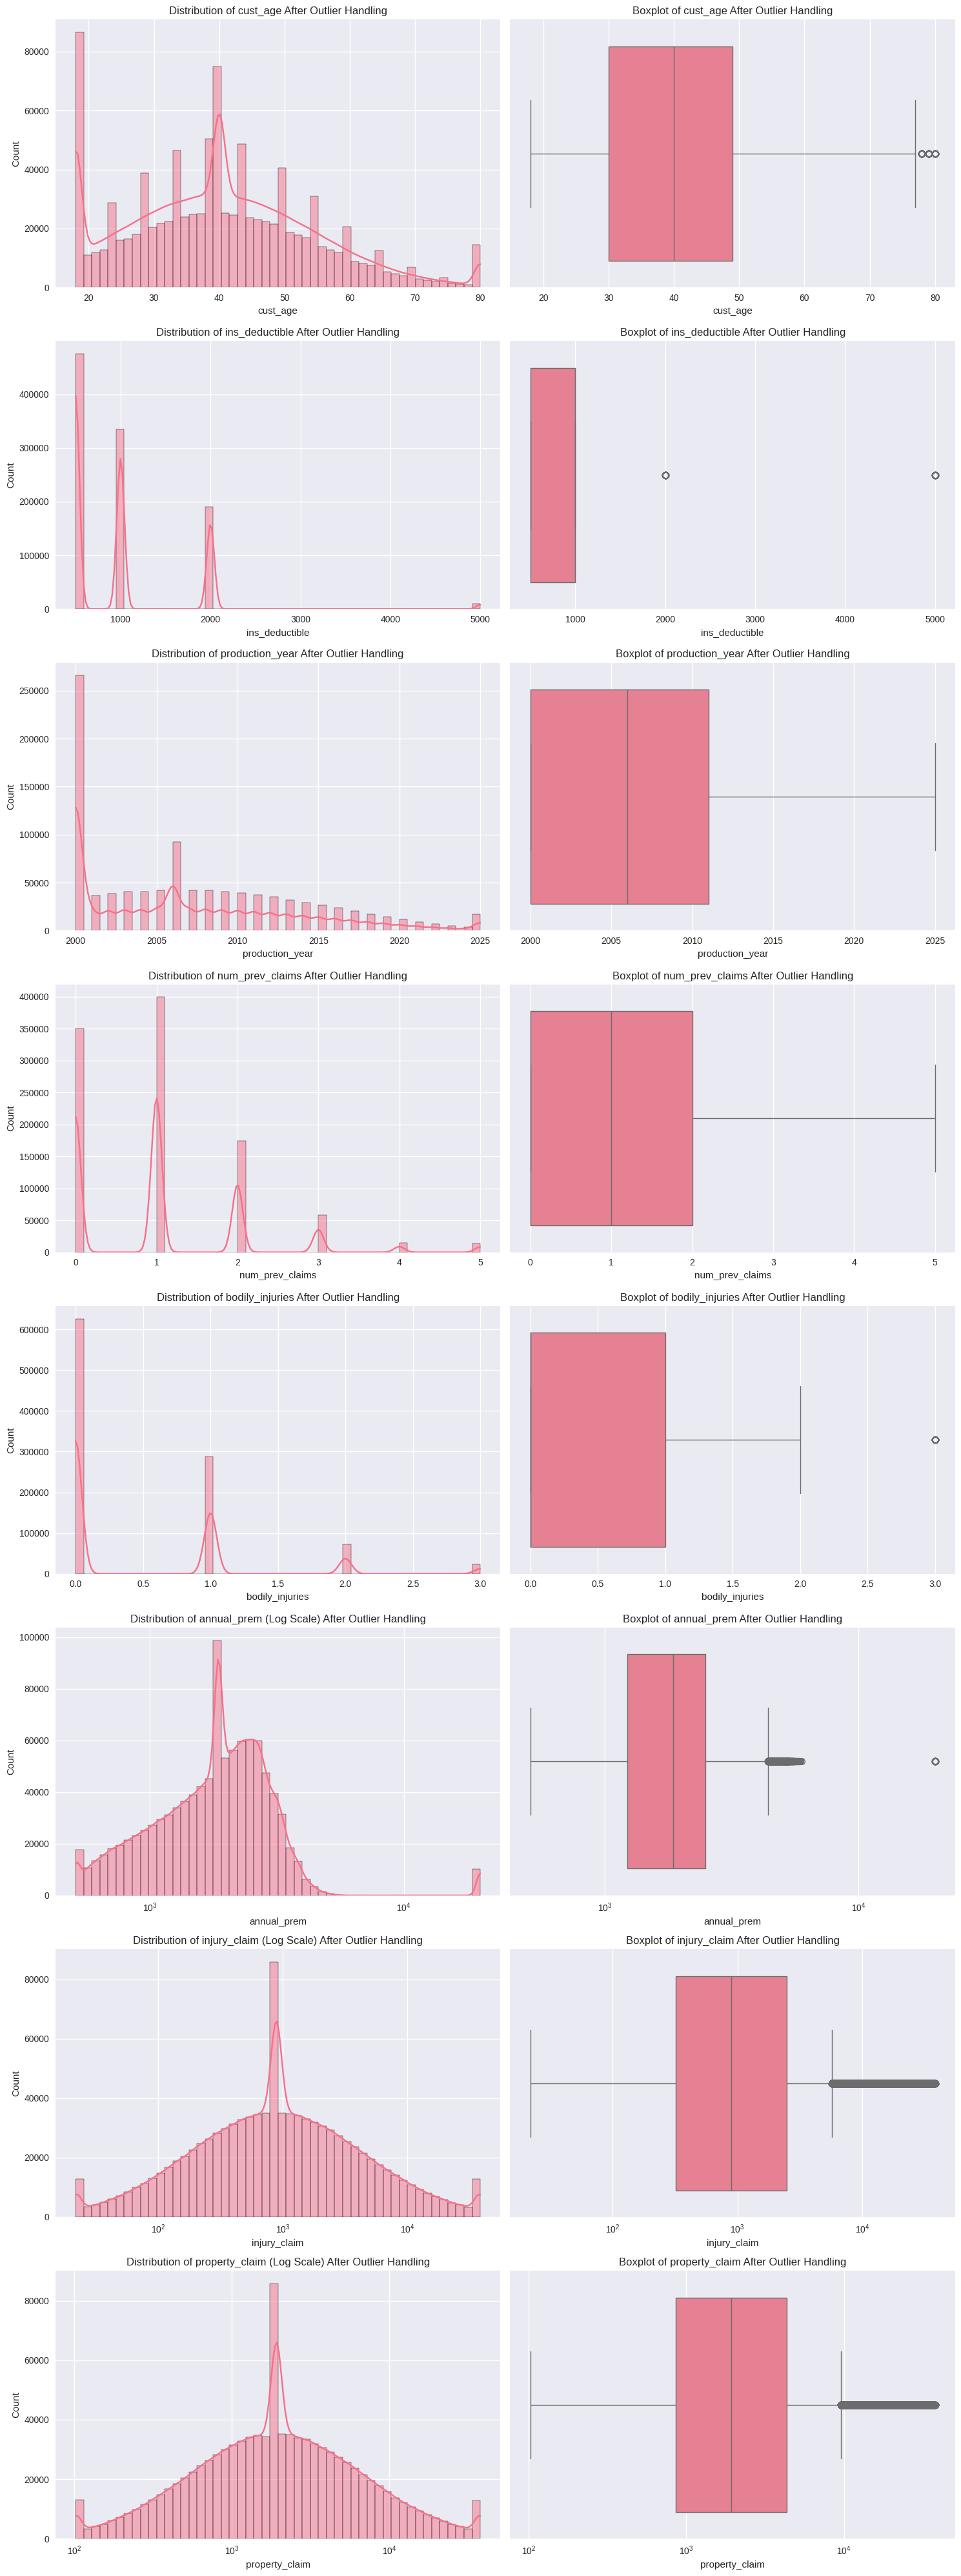

In [79]:
# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Define numerical columns to visualize (excluding zip_code)
numerical_cols = ['cust_age', 'ins_deductible', 'production_year', 'num_prev_claims',
                  'bodily_injuries', 'annual_prem', 'injury_claim', 'property_claim']

# Set up the subplot grid: 2 plots per column (histogram and boxplot), 8 columns
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=2, figsize=(15, 5 * len(numerical_cols)))

# Iterate over each numerical column
for idx, col in enumerate(numerical_cols):
    # Histogram (left subplot)
    ax_hist = axes[idx, 0]
    if col in ['injury_claim', 'property_claim', 'annual_prem']:
        # Use log scale for columns with heavy tails
        sns.histplot(df_cleaned[col], bins=50, kde=True, ax=ax_hist, log_scale=True)
        ax_hist.set_title(f'Distribution of {col} (Log Scale) After Outlier Handling')
    else:
        # Regular scale for other columns
        sns.histplot(df_cleaned[col], bins=50, kde=True, ax=ax_hist)
        ax_hist.set_title(f'Distribution of {col} After Outlier Handling')
    ax_hist.set_xlabel(col)
    ax_hist.set_ylabel('Count')

    # Boxplot (right subplot)
    ax_box = axes[idx, 1]
    sns.boxplot(x=df_cleaned[col], ax=ax_box)
    ax_box.set_title(f'Boxplot of {col} After Outlier Handling')
    if col in ['injury_claim', 'property_claim', 'annual_prem']:
        ax_box.set_xscale('log')  # Use log scale for better visualization
    ax_box.set_xlabel(col)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# **Checking for skewness**

In [80]:
# Define numerical columns to check (excluding zip_code)
numerical_cols = ['cust_age', 'ins_deductible', 'production_year', 'num_prev_claims',
                  'bodily_injuries', 'annual_prem', 'injury_claim', 'property_claim']

# Step 1: Compute skewness for each numerical column
skewness_values = df_cleaned[numerical_cols].apply(skew, nan_policy='omit')

# Step 2: Create a DataFrame to display skewness values and interpretation
skewness_df = pd.DataFrame({
    'Skewness': skewness_values,
    'Interpretation': skewness_values.apply(
        lambda x: 'Highly right-skewed' if x > 1 else
                 'Moderately right-skewed' if 0.5 < x <= 1 else
                 'Fairly symmetric' if -0.5 <= x <= 0.5 else
                 'Moderately left-skewed' if -1 <= x < -0.5 else
                 'Highly left-skewed'
    )
})

# Print the skewness results
print("Skewness of Numerical Columns:\n")
print(skewness_df)

Skewness of Numerical Columns:

                 Skewness           Interpretation
cust_age         0.415524         Fairly symmetric
ins_deductible   2.451760      Highly right-skewed
production_year  0.755343  Moderately right-skewed
num_prev_claims  1.233228      Highly right-skewed
bodily_injuries  1.458026      Highly right-skewed
annual_prem      7.315300      Highly right-skewed
injury_claim     4.121789      Highly right-skewed
property_claim   3.356909      Highly right-skewed


In [81]:
# Copy the DataFrame to avoid modifying the original
df_transformed = df_cleaned.copy()

# Step 1: Create total_claim_amount before transformation
df_transformed['total_claim_amount'] = df_cleaned['injury_claim'] + df_cleaned['property_claim']

# Step 2: Apply transformations
# Square root transformation for moderately skewed columns
for col in ['ins_deductible', 'production_year']:
    df_transformed[f'sqrt_{col}'] = np.sqrt(df_transformed[col])

# Yeo-Johnson transformation for highly skewed columns
# Use separate PowerTransformer objects for each column to save them for later inverse transformation
transformers = {}  # Dictionary to store transformers
highly_skewed_cols = ['num_prev_claims', 'bodily_injuries', 'annual_prem', 'injury_claim', 'property_claim', 'total_claim_amount']
for col in highly_skewed_cols:
    pt = PowerTransformer(method='yeo-johnson')
    df_transformed[f'yeo_{col}'] = pt.fit_transform(df_transformed[[col]])
    transformers[col] = pt  # Save the transformer for later use

# Step 3: Recheck skewness for the transformed columns
transformed_cols = [f'sqrt_{col}' for col in ['ins_deductible', 'production_year']] + \
                  [f'yeo_{col}' for col in highly_skewed_cols]
skewness_values_transformed = df_transformed[transformed_cols].apply(skew, nan_policy='omit')

# Create a DataFrame to display skewness values and interpretation
skewness_df_transformed = pd.DataFrame({
    'Skewness': skewness_values_transformed,
    'Interpretation': skewness_values_transformed.apply(
        lambda x: 'Highly right-skewed' if x > 1 else
                 'Moderately right-skewed' if 0.5 < x <= 1 else
                 'Fairly symmetric' if -0.5 <= x <= 0.5 else
                 'Moderately left-skewed' if -1 <= x < -0.5 else
                 'Highly left-skewed'
    )
})

# Print the skewness results for transformed columns
print("Skewness of Transformed Columns:\n")
print(skewness_df_transformed)

# Optional: Display a few transformed total_claim_amount values
print("\nSample Transformed Total Claim Amount Values:")
print(df_transformed['yeo_total_claim_amount'].head())

Skewness of Transformed Columns:

                        Skewness           Interpretation
sqrt_ins_deductible     1.305901      Highly right-skewed
sqrt_production_year    0.752465  Moderately right-skewed
yeo_num_prev_claims     0.031236         Fairly symmetric
yeo_bodily_injuries     0.533355  Moderately right-skewed
yeo_annual_prem        -0.036865         Fairly symmetric
yeo_injury_claim        0.000823         Fairly symmetric
yeo_property_claim      0.000544         Fairly symmetric
yeo_total_claim_amount  0.000984         Fairly symmetric

Sample Transformed Total Claim Amount Values:
0   -1.367346
1    0.418692
2   -0.295123
3   -0.356692
4    0.120006
Name: yeo_total_claim_amount, dtype: float64


### Applying transformation

In [82]:
# Step 1: Replace the original columns in df_cleaned with the transformed columns from df_transformed
# Square root transformed columns
df_cleaned['ins_deductible'] = df_transformed['sqrt_ins_deductible']
df_cleaned['production_year'] = df_transformed['sqrt_production_year']

# Yeo-Johnson transformed columns
df_cleaned['num_prev_claims'] = df_transformed['yeo_num_prev_claims']
df_cleaned['bodily_injuries'] = df_transformed['yeo_bodily_injuries']
df_cleaned['annual_prem'] = df_transformed['yeo_annual_prem']
df_cleaned['total_claim_amount'] = df_transformed['yeo_total_claim_amount']

# Step 2: Verify the replacement by checking the first few rows of the updated columns
print("First few rows of updated columns in df_cleaned:\n")
updated_cols = ['ins_deductible', 'production_year', 'num_prev_claims', 'bodily_injuries',
                'annual_prem', 'total_claim_amount']
df_cleaned.head()

First few rows of updated columns in df_cleaned:



,policy_id,cust_age,insured_sex,cust_region,coverage_start_date,claim_incurred_date,ins_deductible,production_year,car_brand,num_prev_claims,claim_type,bodily_injuries,zip_code,annual_prem,injury_claim,property_claim,total_claim_amount
0,P000000000,44.0,F,Suburban,2024-04-03,2024-04-03,22.360680,44.754888,Ford,0.250355,Injury,1.169214,91482.0,-1.159990,358.153316,549.289019,-1.367346
1,P000000001,63.0,Female,Suburban,2024-08-15,2024-08-15,31.622777,44.721360,Ford,-1.232174,Collision,-0.778271,91482.0,-0.265345,107.042979,5932.415394,0.418692
2,P000000002,40.0,Male,Urban,2023-12-25,2023-12-25,31.622777,44.788391,BMW,0.250355,Theft,-0.778271,63772.0,0.156067,887.536076,1924.312953,-0.295123
3,P000000003,37.0,Male,Suburban,2022-05-19,2022-05-19,22.360680,44.810713,Toyota,-1.232174,Collision,-0.778271,91482.0,-0.418164,535.592913,2097.988691,-0.356692
4,P000000004,54.0,Male,Suburban,2023-08-01,2023-08-24,22.360680,44.721360,Toyota,1.036214,collision,-0.778271,63772.0,1.348680,435.746725,3945.244397,0.120006


In [83]:
# Recheck skewness to confirm the transformed values
skewness_values_updated = df_cleaned[updated_cols].apply(skew, nan_policy='omit')
skewness_df_updated = pd.DataFrame({
    'Skewness': skewness_values_updated,
    'Interpretation': skewness_values_updated.apply(
        lambda x: 'Highly right-skewed' if x > 1 else
                 'Moderately right-skewed' if 0.5 < x <= 1 else
                 'Fairly symmetric' if -0.5 <= x <= 0.5 else
                 'Moderately left-skewed' if -1 <= x < -0.5 else
                 'Highly left-skewed'
    )
})
print("\nSkewness of Updated Columns in df_cleaned:\n")
print(skewness_df_updated)


Skewness of Updated Columns in df_cleaned:

                    Skewness           Interpretation
ins_deductible      1.305901      Highly right-skewed
production_year     0.752465  Moderately right-skewed
num_prev_claims     0.031236         Fairly symmetric
bodily_injuries     0.533355  Moderately right-skewed
annual_prem        -0.036865         Fairly symmetric
total_claim_amount  0.000984         Fairly symmetric


### Plot to verify the skewness after transformation

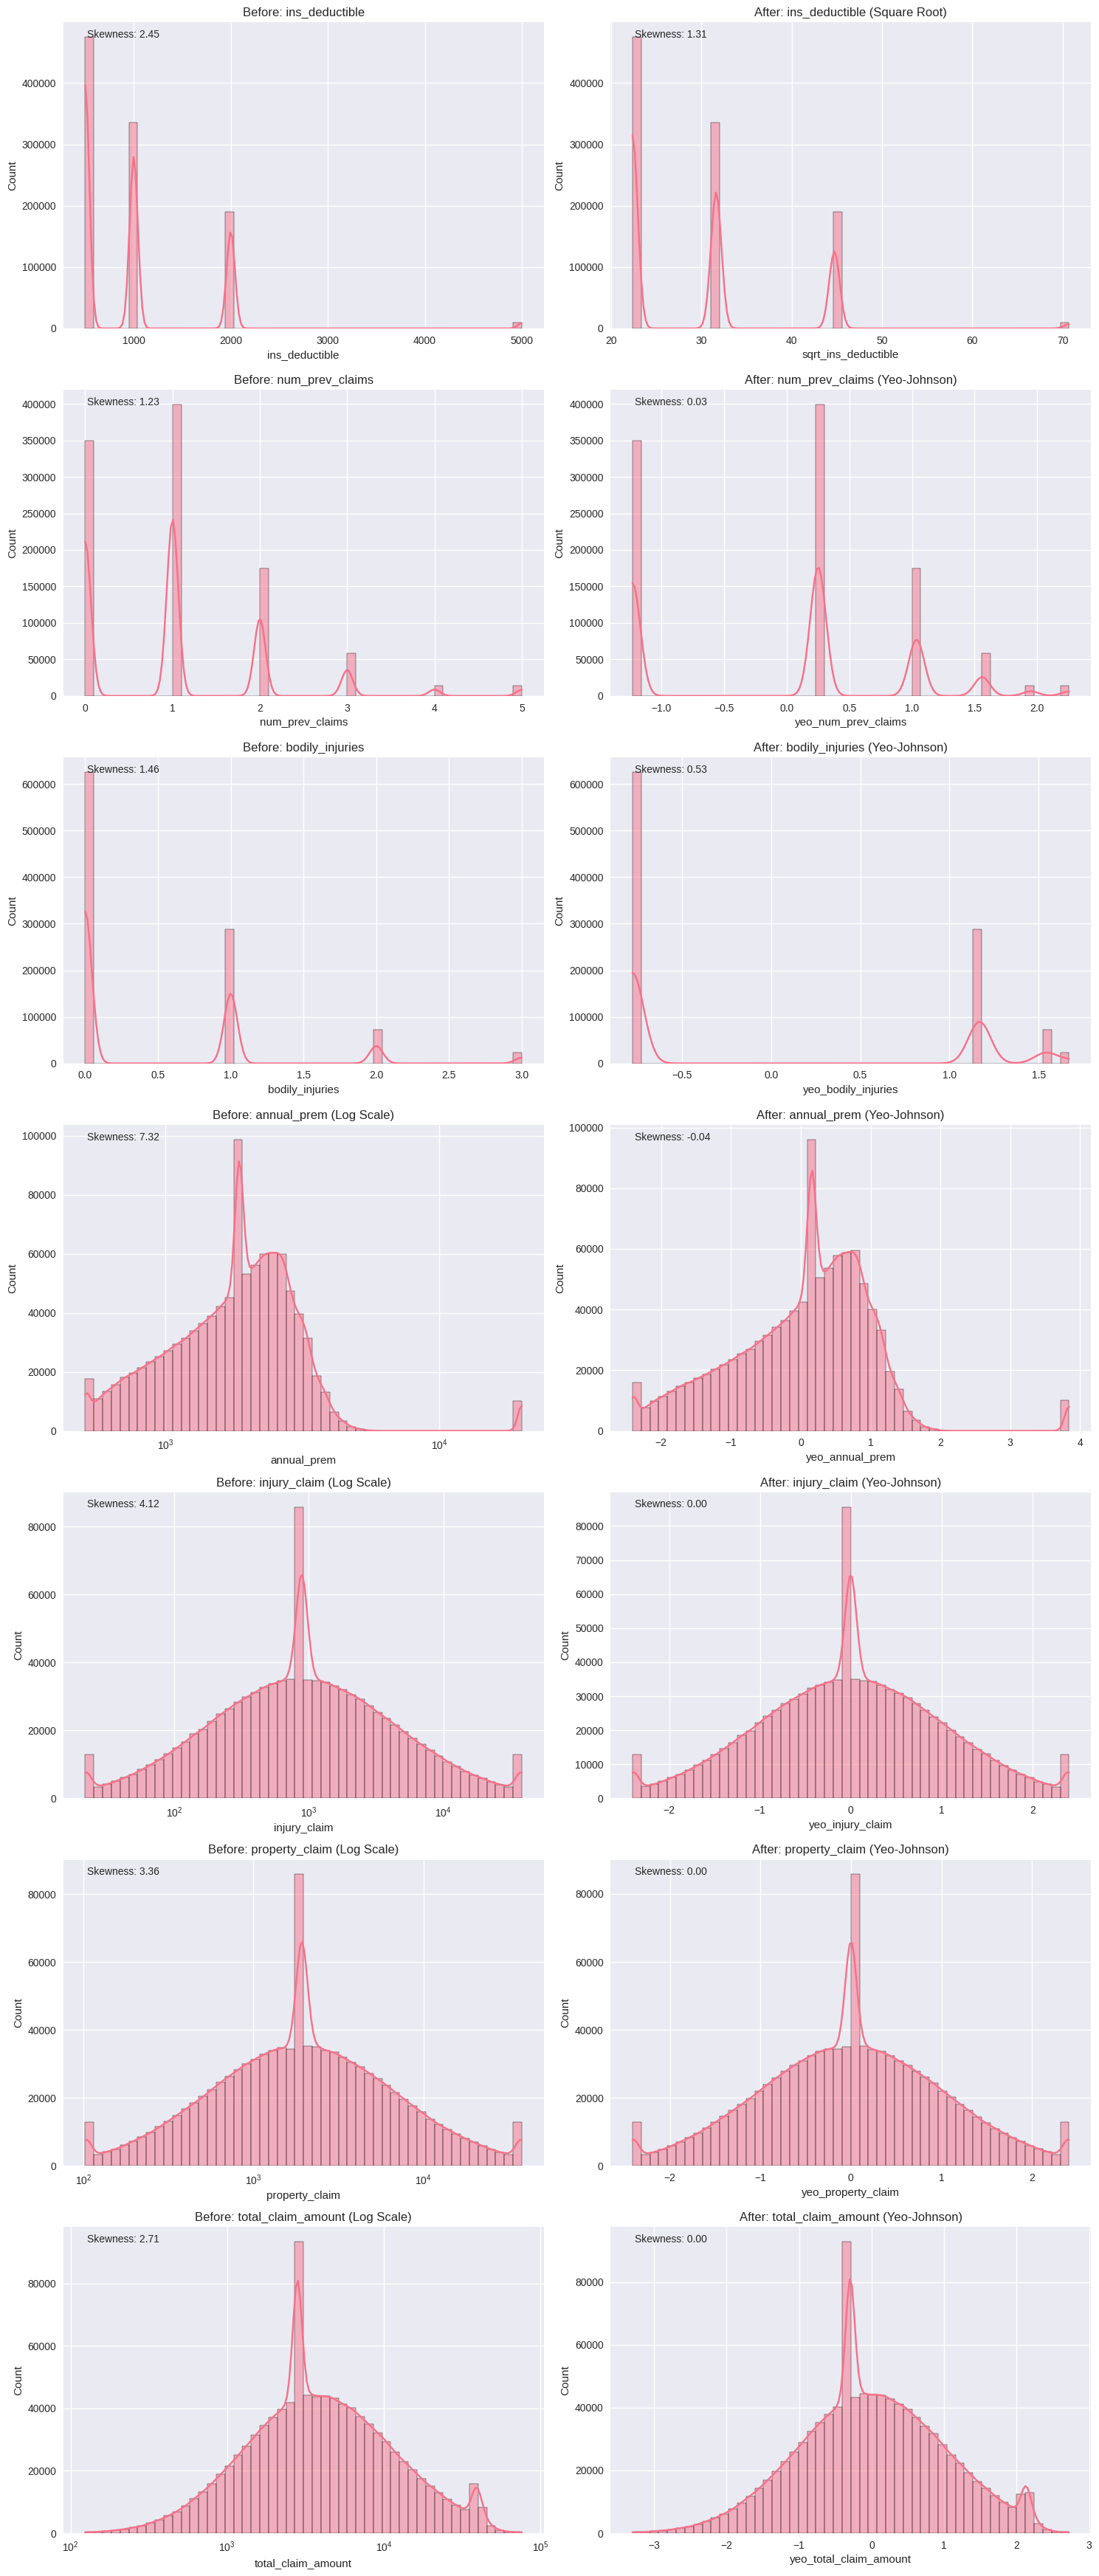

In [84]:
# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Define columns to plot (excluding production_year and zip_code)
columns_to_plot = {
    'ins_deductible': ('ins_deductible', 'sqrt_ins_deductible'),  # Original vs. Square root
    'num_prev_claims': ('num_prev_claims', 'yeo_num_prev_claims'),  # Original vs. Yeo-Johnson
    'bodily_injuries': ('bodily_injuries', 'yeo_bodily_injuries'),  # Original vs. Yeo-Johnson
    'annual_prem': ('annual_prem', 'yeo_annual_prem'),  # Original vs. Yeo-Johnson
    'injury_claim': ('injury_claim', 'yeo_injury_claim'),  # Original vs. Yeo-Johnson
    'property_claim': ('property_claim', 'yeo_property_claim'),  # Original vs. Yeo-Johnson
    'total_claim_amount': ('total_claim_amount', 'yeo_total_claim_amount')  # Original vs. Yeo-Johnson
}

# Set up the subplot grid: 7 rows (one per column), 2 columns (before and after)
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=2, figsize=(15, 5 * len(columns_to_plot)))

# Iterate over each column to plot
for idx, (col_name, (original_col, transformed_col)) in enumerate(columns_to_plot.items()):
    # Before Transformation (left subplot)
    ax_before = axes[idx, 0]
    if col_name in ['annual_prem', 'injury_claim', 'property_claim', 'total_claim_amount']:
        # Use log scale for highly skewed columns
        sns.histplot(df_transformed[original_col], bins=50, kde=True, ax=ax_before, log_scale=True)
        ax_before.set_title(f'Before: {col_name} (Log Scale)')
    else:
        sns.histplot(df_transformed[original_col], bins=50, kde=True, ax=ax_before)
        ax_before.set_title(f'Before: {col_name}')
    ax_before.set_xlabel(col_name)
    ax_before.set_ylabel('Count')
    skew_before = skew(df_transformed[original_col].dropna())
    ax_before.text(0.05, 0.95, f'Skewness: {skew_before:.2f}', transform=ax_before.transAxes, fontsize=10)

    # After Transformation (right subplot)
    ax_after = axes[idx, 1]
    if col_name == 'ins_deductible':
        sns.histplot(df_transformed[transformed_col], bins=50, kde=True, ax=ax_after)
        ax_after.set_title(f'After: {col_name} (Square Root)')
    else:
        sns.histplot(df_transformed[transformed_col], bins=50, kde=True, ax=ax_after)
        ax_after.set_title(f'After: {col_name} (Yeo-Johnson)')
    ax_after.set_xlabel(transformed_col)
    ax_after.set_ylabel('Count')
    skew_after = skew(df_transformed[transformed_col].dropna())
    ax_after.text(0.05, 0.95, f'Skewness: {skew_after:.2f}', transform=ax_after.transAxes, fontsize=10)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## **Checking for Multicollinearity**

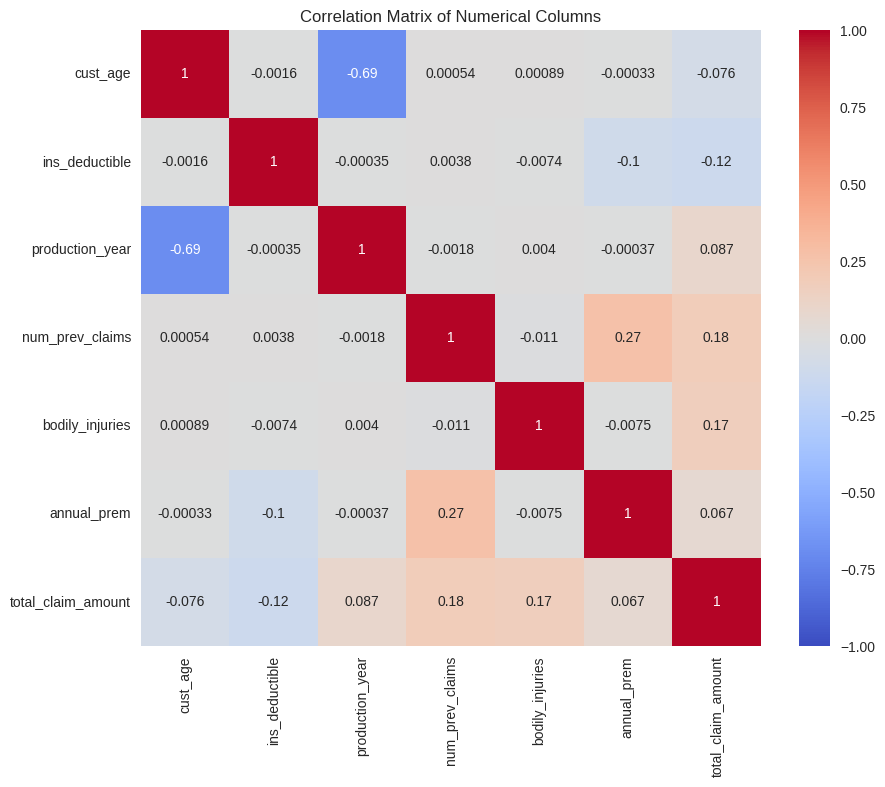


VIF Interpretation:

              Feature        VIF Multicollinearity
0            cust_age   9.166441              High
1      ins_deductible  11.907647              High
2     production_year  20.187166              High
3     num_prev_claims   1.113669               Low
4     bodily_injuries   1.031304               Low
5         annual_prem   1.089056               Low
6  total_claim_amount   1.089186               Low


In [85]:
# Step 1: Define numerical columns to check (excluding zip_code)
numerical_cols = ['cust_age', 'ins_deductible', 'production_year', 'num_prev_claims',
                  'bodily_injuries', 'annual_prem', 'total_claim_amount']

# Step 2: Compute the correlation matrix
correlation_matrix = df_cleaned[numerical_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

# Step 3: Compute the Variance Inflation Factor (VIF)
# Prepare the data for VIF calculation (drop NaN values)
vif_data = df_cleaned[numerical_cols].dropna()

# Create a DataFrame to store VIF values
vif_df = pd.DataFrame()
vif_df['Feature'] = numerical_cols
vif_df['VIF'] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

# Step 4: Interpretation of VIF
vif_df['Multicollinearity'] = vif_df['VIF'].apply(
    lambda x: 'High' if x > 5 else 'Moderate' if x > 2.5 else 'Low'
)
print("\nVIF Interpretation:\n")
print(vif_df[['Feature', 'VIF', 'Multicollinearity']])



*   Dropping production_year because its highly correlated with cust_age
*   combining injury_claim and property_claim to determine the severity of claims



### Tested models before and after dropping the production year column. Dropping the column didnt increase the acuracy of the model.

In [86]:
# Drop production_year
#df_cleaned = df_cleaned.drop(columns=['production_year'])

In [87]:
df_cleaned.head()


,policy_id,cust_age,insured_sex,cust_region,coverage_start_date,claim_incurred_date,ins_deductible,production_year,car_brand,num_prev_claims,claim_type,bodily_injuries,zip_code,annual_prem,injury_claim,property_claim,total_claim_amount
0,P000000000,44.0,F,Suburban,2024-04-03,2024-04-03,22.360680,44.754888,Ford,0.250355,Injury,1.169214,91482.0,-1.159990,358.153316,549.289019,-1.367346
1,P000000001,63.0,Female,Suburban,2024-08-15,2024-08-15,31.622777,44.721360,Ford,-1.232174,Collision,-0.778271,91482.0,-0.265345,107.042979,5932.415394,0.418692
2,P000000002,40.0,Male,Urban,2023-12-25,2023-12-25,31.622777,44.788391,BMW,0.250355,Theft,-0.778271,63772.0,0.156067,887.536076,1924.312953,-0.295123
3,P000000003,37.0,Male,Suburban,2022-05-19,2022-05-19,22.360680,44.810713,Toyota,-1.232174,Collision,-0.778271,91482.0,-0.418164,535.592913,2097.988691,-0.356692
4,P000000004,54.0,Male,Suburban,2023-08-01,2023-08-24,22.360680,44.721360,Toyota,1.036214,collision,-0.778271,63772.0,1.348680,435.746725,3945.244397,0.120006


## **Dropping Zip_code as it has no relvance with the prediction of severity of claims**

In [89]:
# Drop zip_code
df_cleaned = df_cleaned.drop(columns=['zip_code'])

# **Dealing with Irregularities in the Categorical data**

#### Dealing with unrealistic dates in the coverage_start_date & claim_incurred_date columns

In [90]:
# Step 1: Convert date columns to datetime format (if not already done)
df_cleaned['coverage_start_date'] = pd.to_datetime(df_cleaned['coverage_start_date'], errors='coerce')
df_cleaned['claim_incurred_date'] = pd.to_datetime(df_cleaned['claim_incurred_date'], errors='coerce')

# Step 2: Define the current date (March 26, 2025)
current_date = pd.to_datetime('2025-03-26')

# Step 3: Handle unrealistic values in coverage_start_date
# Identify future dates in coverage_start_date
future_coverage_mask = df_cleaned['coverage_start_date'] > current_date
print(f"Number of unrealistic coverage_start_date (future dates): {future_coverage_mask.sum()}")
if future_coverage_mask.sum() > 0:
    print("Sample unrealistic coverage_start_date:")
    print(df_cleaned[future_coverage_mask]['coverage_start_date'].head())

# Cap future dates at the current date
df_cleaned.loc[future_coverage_mask, 'coverage_start_date'] = current_date

# Step 4: Handle unrealistic values in claim_incurred_date
# Identify future dates in claim_incurred_date
future_claim_mask = df_cleaned['claim_incurred_date'] > current_date
print(f"\nNumber of unrealistic claim_incurred_date (future dates): {future_claim_mask.sum()}")
if future_claim_mask.sum() > 0:
    print("Sample unrealistic claim_incurred_date:")
    print(df_cleaned[future_claim_mask]['claim_incurred_date'].head())

# Cap future dates at the current date
df_cleaned.loc[future_claim_mask, 'claim_incurred_date'] = current_date

# Step 5: Ensure claim_incurred_date is not before coverage_start_date
invalid_date_order_mask = df_cleaned['claim_incurred_date'] < df_cleaned['coverage_start_date']
print(f"\nNumber of rows where claim_incurred_date is before coverage_start_date: {invalid_date_order_mask.sum()}")
if invalid_date_order_mask.sum() > 0:
    print("Sample rows with invalid date order:")
    print(df_cleaned[invalid_date_order_mask][['coverage_start_date', 'claim_incurred_date']].head())

# Set claim_incurred_date to coverage_start_date for invalid cases
df_cleaned.loc[invalid_date_order_mask, 'claim_incurred_date'] = df_cleaned.loc[invalid_date_order_mask, 'coverage_start_date']

# Step 6: Verify the changes
print("\nRange of coverage_start_date after handling:")
print(f"Min: {df_cleaned['coverage_start_date'].min()}")
print(f"Max: {df_cleaned['coverage_start_date'].max()}")

print("\nRange of claim_incurred_date after handling:")
print(f"Min: {df_cleaned['claim_incurred_date'].min()}")
print(f"Max: {df_cleaned['claim_incurred_date'].max()}")

# Recheck for invalid date order
invalid_date_order_mask_after = df_cleaned['claim_incurred_date'] < df_cleaned['coverage_start_date']
print(f"\nNumber of rows where claim_incurred_date is before coverage_start_date after handling: {invalid_date_order_mask_after.sum()}")

Number of unrealistic coverage_start_date (future dates): 10064
Sample unrealistic coverage_start_date:
19    2026-01-01
421   2026-01-01
507   2026-01-01
518   2026-01-01
843   2026-01-01
Name: coverage_start_date, dtype: datetime64[ns]

Number of unrealistic claim_incurred_date (future dates): 19409
Sample unrealistic claim_incurred_date:
9     2260-12-31
19    2026-01-01
278   2260-12-31
421   2026-01-01
473   2260-12-31
Name: claim_incurred_date, dtype: datetime64[ns]

Number of rows where claim_incurred_date is before coverage_start_date: 38108
Sample rows with invalid date order:
    coverage_start_date claim_incurred_date
48           2024-04-26          2023-10-04
72           2022-09-30          2020-09-24
156          2024-02-01          2023-10-04
188          2022-09-30          2021-12-30
195          2022-09-30          2020-06-09

Range of coverage_start_date after handling:
Min: 2020-03-23 00:00:00
Max: 2025-03-26 00:00:00

Range of claim_incurred_date after handling:
M

### Checking for irregularities in the insured_sex column

In [91]:
# Step 1: Inspect unique values in insured_sex
print("Unique values in insured_sex before standardization:")
print(df_cleaned['insured_sex'].unique())

Unique values in insured_sex before standardization:
['F' 'Female' 'Male' 'M' 'male' 'Other' 'female']


In [92]:
# Step 1: Inspect the distribution of insured_sex before standardization
print("Distribution of insured_sex before standardization:")
print(df_cleaned['insured_sex'].value_counts())

Distribution of insured_sex before standardization:
insured_sex
Male      574984
Female    197548
M          69465
male       69110
Other      49314
F          24862
female     24717
Name: count, dtype: int64


In [93]:
# Step 2: Standardize the values
# Convert to lowercase to handle case sensitivity
df_cleaned['insured_sex'] = df_cleaned['insured_sex'].str.lower()

# Define a mapping for variations
sex_mapping = {
    'm': 'male',
    'male': 'male',
    'f': 'female',
    'female': 'female',
    'other': 'other'
}

# Apply the mapping
df_cleaned['insured_sex'] = df_cleaned['insured_sex'].map(sex_mapping)

In [94]:
# Step 3: Handle unmapped values (e.g., "other" → NaN)
print("\nNumber of NaN values in insured_sex after mapping:", df_cleaned['insured_sex'].isna().sum())


Number of NaN values in insured_sex after mapping: 0


In [95]:
# Step 4: Capitalize the first letter for readability
df_cleaned['insured_sex'] = df_cleaned['insured_sex'].str.capitalize()

# Step 5: Verify the changes
print("\nUnique values in insured_sex after standardization:")
print(df_cleaned['insured_sex'].unique())

print("\nDistribution of insured_sex after standardization:")
print(df_cleaned['insured_sex'].value_counts())


Unique values in insured_sex after standardization:
['Female' 'Male' 'Other']

Distribution of insured_sex after standardization:
insured_sex
Male      713559
Female    247127
Other      49314
Name: count, dtype: int64


### Handling the irregularities in the car_brand column

In [96]:
# Step 1: Inspect unique values in car_brand
print("Unique values in car_brand before standardization:")
print(df_cleaned['car_brand'].unique())

Unique values in car_brand before standardization:
['Ford' 'BMW' 'Toyota' 'Tesla' 'Honda' 'Bmw' 'toyota']


In [97]:
# Step 2: Standardize the values
# Convert to lowercase to handle case sensitivity
df_cleaned['car_brand'] = df_cleaned['car_brand'].str.lower()

# Define a mapping for variations with correct capitalization
car_brand_mapping = {
    'ford': 'Ford',
    'bmw': 'BMW',
    'toyota': 'Toyota',
    'tesla': 'Tesla',
    'honda': 'Honda'
}

# Apply the mapping
df_cleaned['car_brand'] = df_cleaned['car_brand'].map(car_brand_mapping)

In [98]:
# Step 3: Handle any unmapped values (e.g., NaN or unexpected values)
# Check for NaN values after mapping
print("\nNumber of NaN values in car_brand after mapping:", df_cleaned['car_brand'].isna().sum())


Number of NaN values in car_brand after mapping: 0


In [99]:
# Step 4: Verify the changes
print("\nUnique values in car_brand after standardization:")
print(df_cleaned['car_brand'].unique())

print("\nDistribution of car_brand after standardization:")
print(df_cleaned['car_brand'].value_counts())


Unique values in car_brand after standardization:
['Ford' 'BMW' 'Toyota' 'Tesla' 'Honda']

Distribution of car_brand after standardization:
car_brand
Tesla     242551
Toyota    192414
BMW       191764
Honda     191677
Ford      191594
Name: count, dtype: int64


### Handling the irregularities in the cust_region column

In [100]:
# Step 1: Inspect unique values and distribution in cust_region
print("Unique values in cust_region before standardization:")
print(df_cleaned['cust_region'].unique())

Unique values in cust_region before standardization:
['Suburban' 'Urban' 'Urbann' 'Rural' 'Rurral' 'SubUrban']


In [101]:
# Step 2: Standardize the values
# Convert to lowercase to handle case sensitivity
df_cleaned['cust_region'] = df_cleaned['cust_region'].str.lower()

# Define a mapping for variations and typos
region_mapping = {
    'urban': 'urban',
    'urbann': 'urban',  # Fix typo
    'suburban': 'suburban',
    'subUrban': 'suburban',  # Already converted to lowercase, but included for clarity
    'rural': 'rural',
    'rurral': 'rural'  # Fix typo
}

# Apply the mapping
df_cleaned['cust_region'] = df_cleaned['cust_region'].map(region_mapping)

In [102]:
# Step 3: Handle any unmapped values (e.g., NaN or unexpected values)
# Check for NaN values after mapping
print("\nNumber of NaN values in cust_region after mapping:", df_cleaned['cust_region'].isna().sum())


Number of NaN values in cust_region after mapping: 0


In [103]:
# Step 4: Capitalize the first letter for readability
df_cleaned['cust_region'] = df_cleaned['cust_region'].str.capitalize()

# Step 5: Verify the changes
print("\nUnique values in cust_region after standardization:")
print(df_cleaned['cust_region'].unique())

print("\nDistribution of cust_region after standardization:")
print(df_cleaned['cust_region'].value_counts())


Unique values in cust_region after standardization:
['Suburban' 'Urban' 'Rural']

Distribution of cust_region after standardization:
cust_region
Urban       433754
Suburban    336304
Rural       239942
Name: count, dtype: int64


### Handling the irregularities in the claim_type column

In [104]:
# Step 1: Inspect unique values and distribution in claim_type
print("Unique values in claim_type before standardization:")
print(df_cleaned['claim_type'].unique())

Unique values in claim_type before standardization:
['Injury' 'Collision' 'Theft' 'collision' 'COLLISION' 'Theft!' 'injury']


In [105]:
# Step 2: Standardize the values
# Convert to lowercase to handle case sensitivity
df_cleaned['claim_type'] = df_cleaned['claim_type'].str.lower()

# Remove punctuation (e.g., "theft!" → "theft")
df_cleaned['claim_type'] = df_cleaned['claim_type'].str.replace('!', '', regex=False)

# Define a mapping for variations
claim_type_mapping = {
    'collision': 'collision',
    'theft': 'theft',
    'injury': 'injury'
}

# Apply the mapping
df_cleaned['claim_type'] = df_cleaned['claim_type'].map(claim_type_mapping)

In [106]:
# Step 3: Handle any unmapped values (e.g., NaN or unexpected values)
# Check for NaN values after mapping
print("\nNumber of NaN values in claim_type after mapping:", df_cleaned['claim_type'].isna().sum())


Number of NaN values in claim_type after mapping: 0


In [107]:
# Step 4: Capitalize the first letter for readability
df_cleaned['claim_type'] = df_cleaned['claim_type'].str.capitalize()

# Step 5: Verify the changes
print("\nUnique values in claim_type after standardization:")
print(df_cleaned['claim_type'].unique())


Unique values in claim_type after standardization:
['Injury' 'Collision' 'Theft']


### Checking for duplicates in the policy_id column

In [108]:
total_rows = df_cleaned.shape[0]
print(f"Total number of rows in df_cleaned: {total_rows}")

# Number of unique policy_id values
unique_policy_ids = df_cleaned['policy_id'].nunique()
print(f"Number of unique policy_id values: {unique_policy_ids}")

Total number of rows in df_cleaned: 1010000
Number of unique policy_id values: 1000000


In [109]:
# Check for duplicates
duplicates = df_cleaned['policy_id'].duplicated(keep=False)  # Marks all instances of duplicated policy_id
num_duplicate_rows = duplicates.sum()
print(f"Number of rows with duplicated policy_id (including all instances): {num_duplicate_rows}")

Number of rows with duplicated policy_id (including all instances): 20000


In [110]:
# Calculate the number of rows to be removed (keep only the first occurrence)
num_rows_to_remove = total_rows - unique_policy_ids
print(f"Number of duplicate rows to be removed: {num_rows_to_remove}")

Number of duplicate rows to be removed: 10000


In [111]:
# Calculate the percentage of duplicated rows
duplicate_percentage = (num_rows_to_remove / total_rows) * 100
print(f"Percentage of rows that are duplicates: {duplicate_percentage:.2f}%")

Percentage of rows that are duplicates: 0.99%


In [112]:
# Step 2: Remove duplicates (keep the first occurrence)
df_cleaned = df_cleaned.drop_duplicates(subset=['policy_id'], keep='first')

In [113]:
# Step 3: Verify the changes
# Check the new shape of the dataset
new_total_rows = df_cleaned.shape[0]
print(f"\nTotal number of rows in df_cleaned after removing duplicates: {new_total_rows}")


Total number of rows in df_cleaned after removing duplicates: 1000000


In [114]:
# Recheck the number of unique policy_id values
new_unique_policy_ids = df_cleaned['policy_id'].nunique()
print(f"Number of unique policy_id values after removing duplicates: {new_unique_policy_ids}")

# Confirm no duplicates remain
remaining_duplicates = df_cleaned['policy_id'].duplicated().sum()
print(f"Number of remaining duplicate policy_id values: {remaining_duplicates}")

Number of unique policy_id values after removing duplicates: 1000000
Number of remaining duplicate policy_id values: 0


## **Comparing the the total claims with other variables in the dataset for determining the Severity of claims.**

In [115]:
# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Use a valid Matplotlib style or skip it (Seaborn applies its own style)
plt.style.use('seaborn-v0_8')  # Updated style name
sns.set_palette('husl')

In [116]:
# Define numerical and categorical columns
numerical_cols = ['cust_age', 'ins_deductible', 'production_year', 'num_prev_claims',
                  'bodily_injuries', 'annual_prem', 'total_claim_amount']
categorical_cols = ['insured_sex', 'cust_region', 'car_brand', 'claim_type']

# Verify data
print("DataFrame Info:")
print(df_cleaned.info())
print("\nFirst 5 rows:")
print(df_cleaned[numerical_cols + categorical_cols].head())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 0 to 1008999
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   policy_id            1000000 non-null  object        
 1   cust_age             1000000 non-null  float64       
 2   insured_sex          1000000 non-null  object        
 3   cust_region          1000000 non-null  object        
 4   coverage_start_date  1000000 non-null  datetime64[ns]
 5   claim_incurred_date  1000000 non-null  datetime64[ns]
 6   ins_deductible       1000000 non-null  float64       
 7   production_year      1000000 non-null  float64       
 8   car_brand            1000000 non-null  object        
 9   num_prev_claims      1000000 non-null  float64       
 10  claim_type           1000000 non-null  object        
 11  bodily_injuries      1000000 non-null  float64       
 12  annual_prem          1000000 non-null  float6

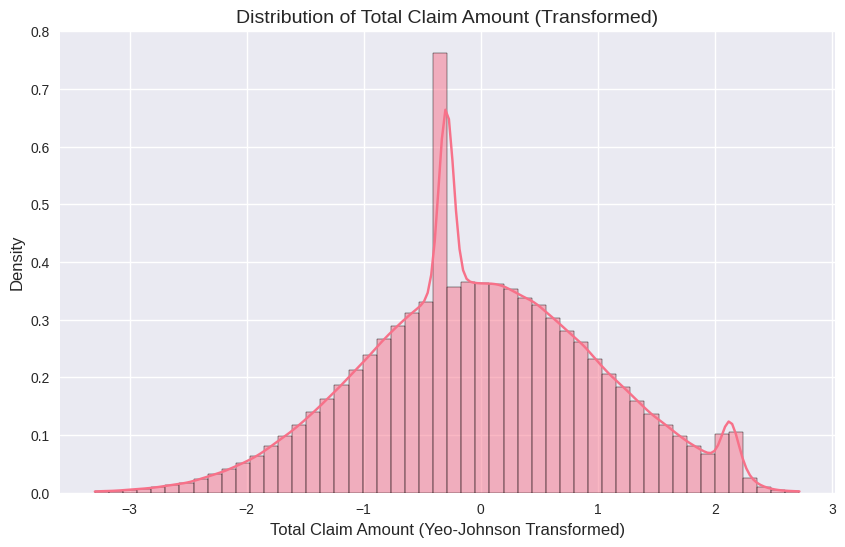

In [117]:
# Plot histogram with KDE for total_claim_amount
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['total_claim_amount'], bins=50, kde=True, stat='density')
plt.title('Distribution of Total Claim Amount (Transformed)', fontsize=14)
plt.xlabel('Total Claim Amount (Yeo-Johnson Transformed)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

In [ ]:
# Scatter plots for numerical predictors vs total_claim_amount
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols[:-1]):  # Exclude total_claim_amount itself
    sns.regplot(x=df_cleaned[col], y=df_cleaned['total_claim_amount'], ax=axes[idx],
                scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    axes[idx].set_title(f'Total Claim Amount vs {col}', fontsize=12)
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Total Claim Amount', fontsize=10)

# Remove empty subplot (if any)
if len(numerical_cols[:-1]) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

## Creation of scatter plot With sampling for faster computation

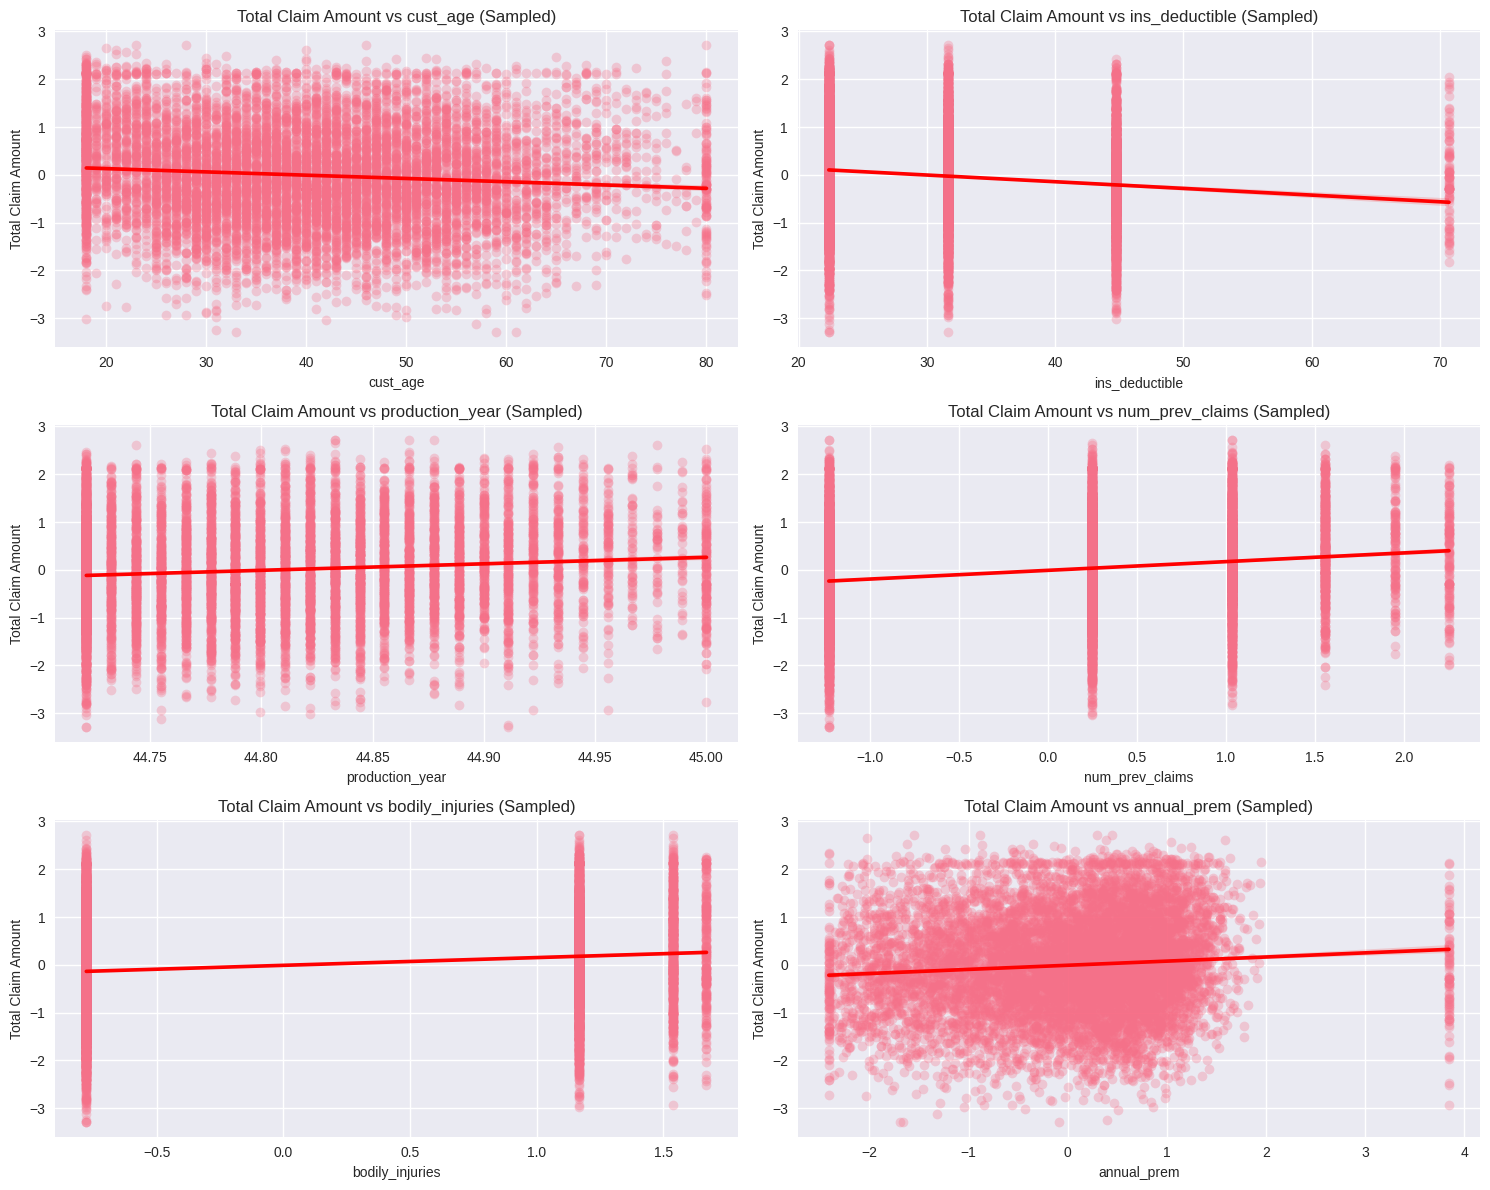

In [118]:
# Sample 10,000 rows for faster computation
df_sample = df_cleaned.sample(10000, random_state=42)

# Scatter plots for numerical predictors vs total_claim_amount
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols[:-1]):  # Exclude total_claim_amount itself
    sns.regplot(x=df_sample[col], y=df_sample['total_claim_amount'], ax=axes[idx],
                scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    axes[idx].set_title(f'Total Claim Amount vs {col} (Sampled)', fontsize=12)
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Total Claim Amount', fontsize=10)

# Remove empty subplot (if any)
if len(numerical_cols[:-1]) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

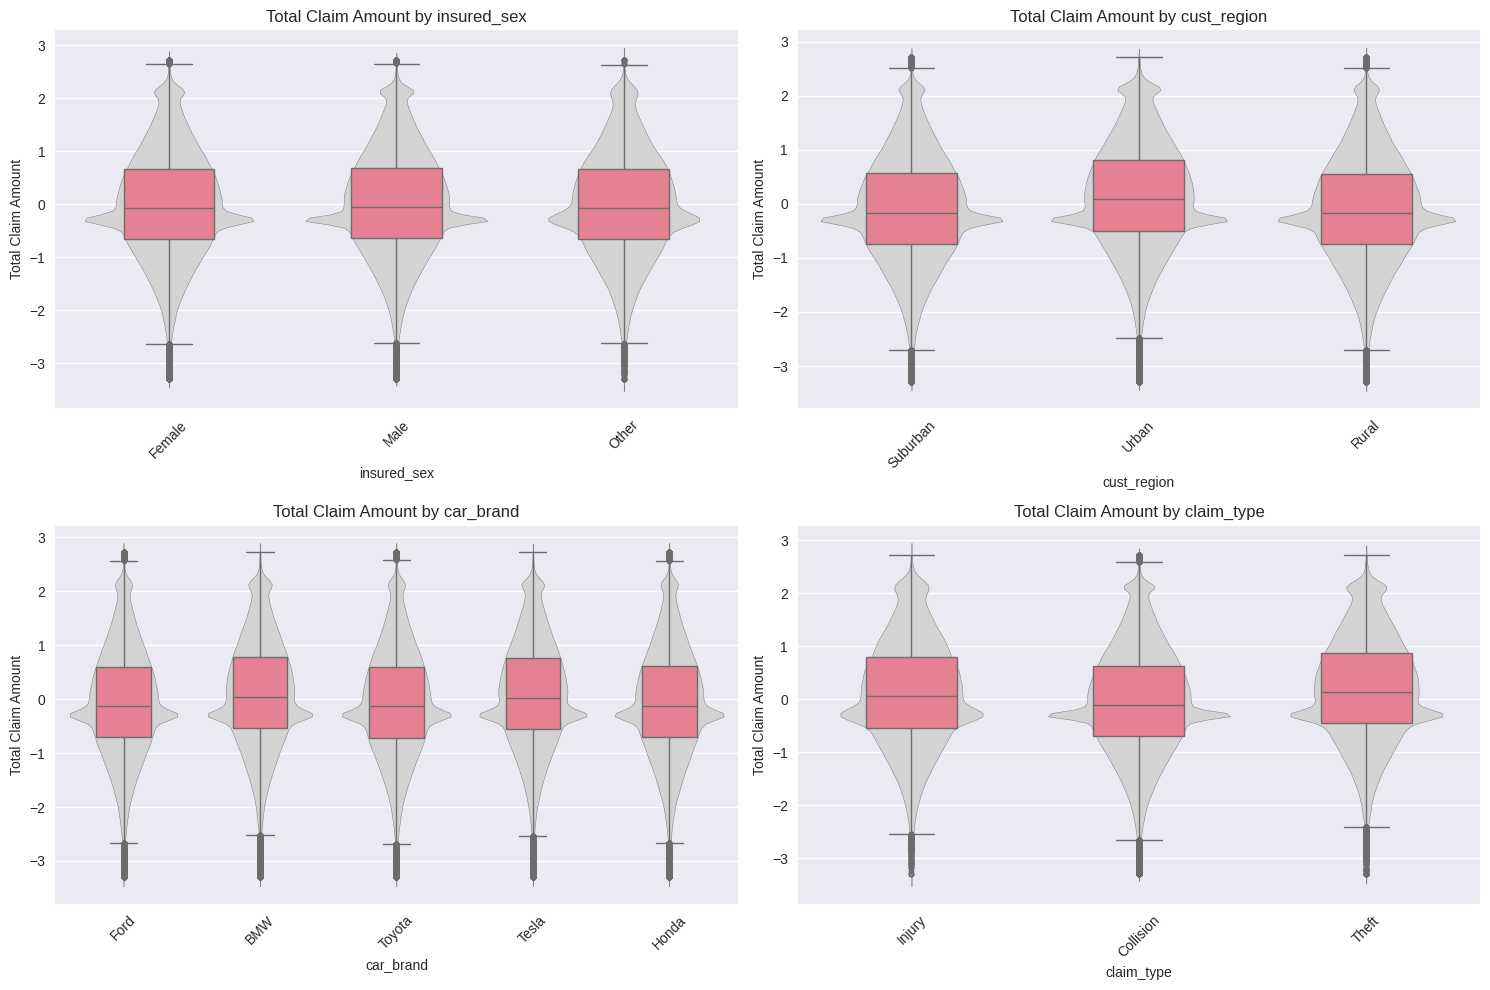

In [119]:
# Box plots with violin overlay for categorical predictors
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    sns.violinplot(x=df_cleaned[col], y=df_cleaned['total_claim_amount'], ax=axes[idx],
                   inner=None, color='lightgray')
    sns.boxplot(x=df_cleaned[col], y=df_cleaned['total_claim_amount'], ax=axes[idx],
                width=0.4, fliersize=3)
    axes[idx].set_title(f'Total Claim Amount by {col}', fontsize=12)
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Total Claim Amount', fontsize=10)
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

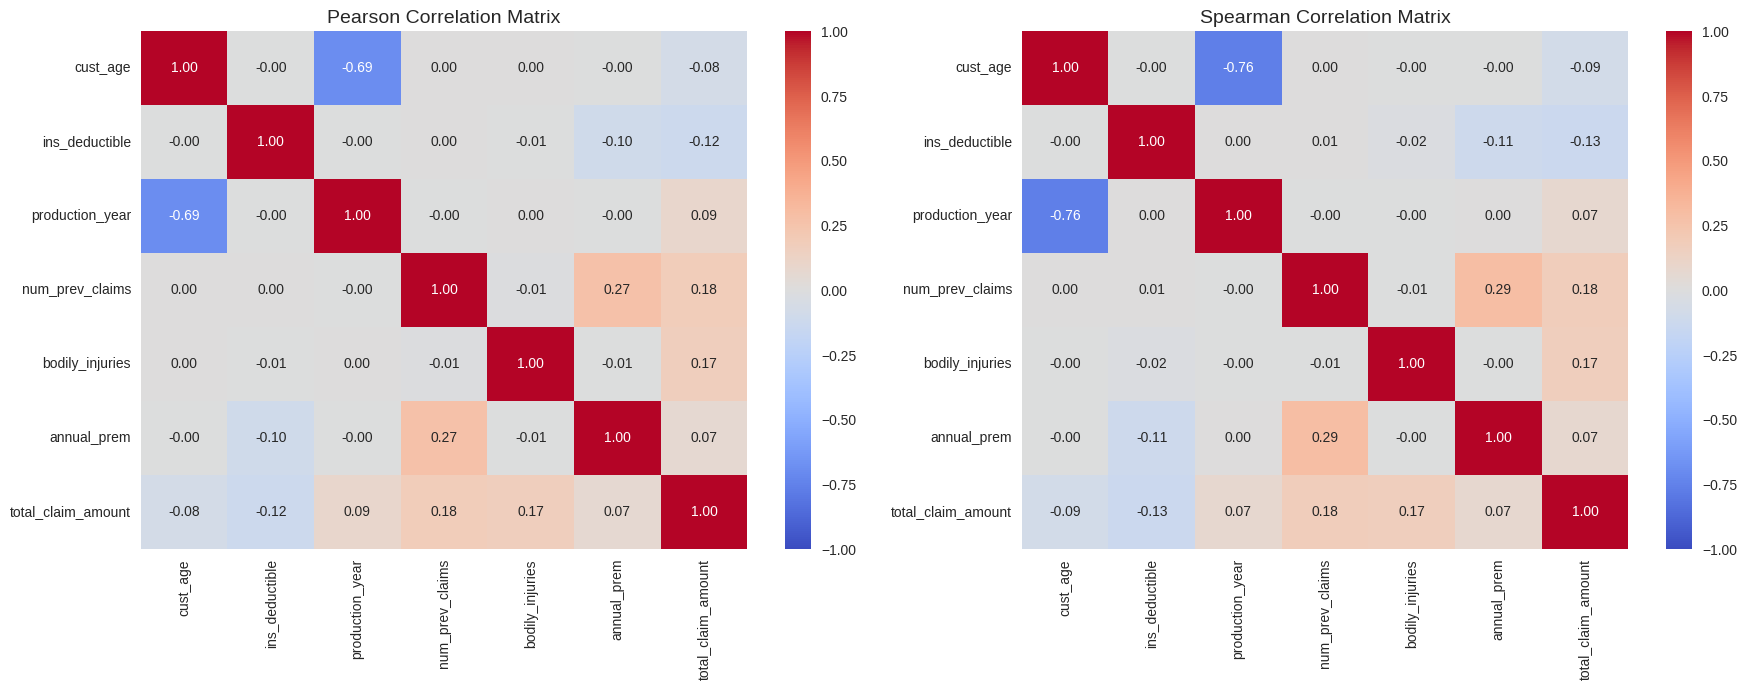

Pearson Correlations with total_claim_amount:
total_claim_amount    1.000000
num_prev_claims       0.180049
bodily_injuries       0.167549
production_year       0.087122
annual_prem           0.066867
cust_age             -0.075472
ins_deductible       -0.122221
Name: total_claim_amount, dtype: float64

Spearman Correlations with total_claim_amount:
total_claim_amount    1.000000
num_prev_claims       0.179080
bodily_injuries       0.168373
annual_prem           0.074235
production_year       0.070433
cust_age             -0.085000
ins_deductible       -0.129883
Name: total_claim_amount, dtype: float64


In [120]:
# Compute Pearson and Spearman correlation matrices
pearson_corr = df_cleaned[numerical_cols].corr(method='pearson')
spearman_corr = df_cleaned[numerical_cols].corr(method='spearman')

# Plot dual heatmap
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Pearson heatmap
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,
            fmt='.2f', ax=ax1)
ax1.set_title('Pearson Correlation Matrix', fontsize=14)

# Spearman heatmap
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,
            fmt='.2f', ax=ax2)
ax2.set_title('Spearman Correlation Matrix', fontsize=14)

plt.tight_layout()
plt.show()

# Print correlation summary
print("Pearson Correlations with total_claim_amount:")
print(pearson_corr['total_claim_amount'].sort_values(ascending=False))
print("\nSpearman Correlations with total_claim_amount:")
print(spearman_corr['total_claim_amount'].sort_values(ascending=False))

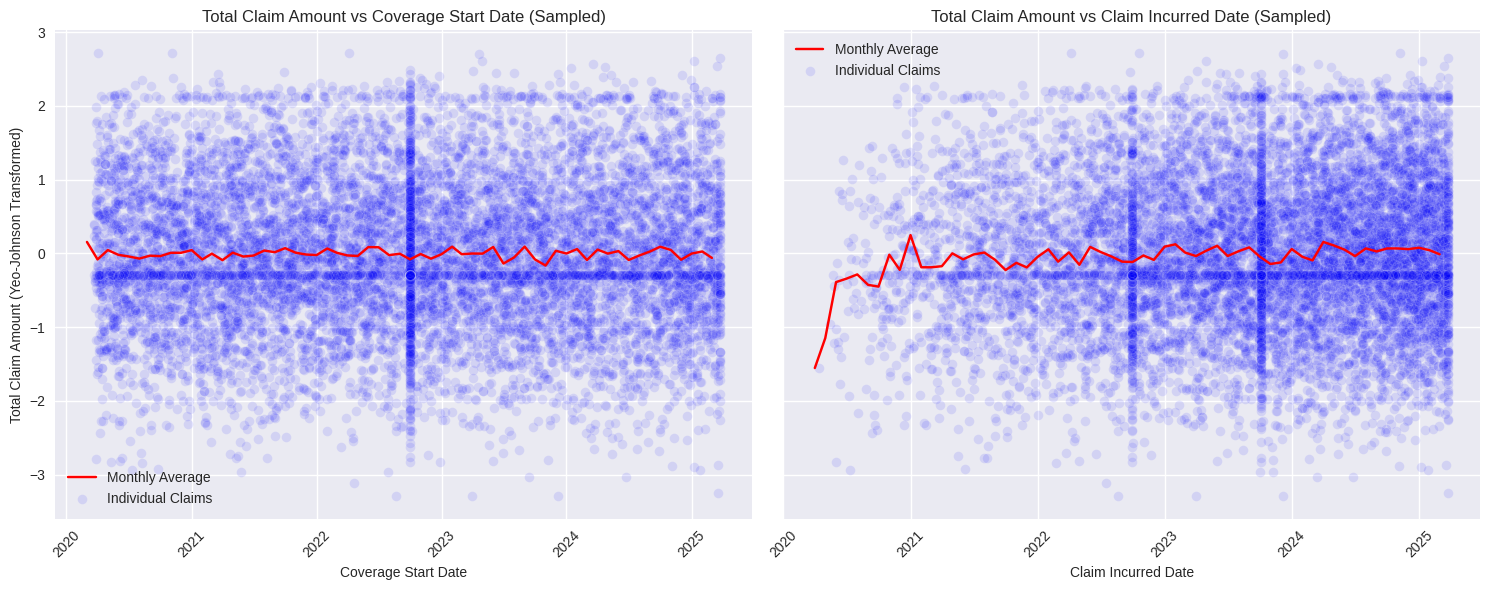

In [121]:
# Sample 10,000 rows from df_cleaned for faster computation
df_sample = df_cleaned.sample(10000, random_state=42)

# Convert date columns to datetime
df_sample['coverage_start_date'] = pd.to_datetime(df_sample['coverage_start_date'], errors='coerce')
df_sample['claim_incurred_date'] = pd.to_datetime(df_sample['claim_incurred_date'], errors='coerce')

# Aggregate by month for both date columns
df_sample['coverage_year_month'] = df_sample['coverage_start_date'].dt.to_period('M')
df_sample['claim_year_month'] = df_sample['claim_incurred_date'].dt.to_period('M')

# Calculate mean total_claim_amount per month
coverage_avg = df_sample.groupby('coverage_year_month')['total_claim_amount'].mean().reset_index()
claim_avg = df_sample.groupby('claim_year_month')['total_claim_amount'].mean().reset_index()

# Convert year_month back to datetime for plotting
coverage_avg['coverage_year_month'] = coverage_avg['coverage_year_month'].dt.to_timestamp()
claim_avg['claim_year_month'] = claim_avg['claim_year_month'].dt.to_timestamp()

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Plot for coverage_start_date
sns.lineplot(x='coverage_year_month', y='total_claim_amount', data=coverage_avg, color='red', label='Monthly Average', ax=ax1)
sns.scatterplot(x='coverage_start_date', y='total_claim_amount', data=df_sample, alpha=0.1, color='blue', label='Individual Claims', ax=ax1)
ax1.set_title('Total Claim Amount vs Coverage Start Date (Sampled)', fontsize=12)
ax1.set_xlabel('Coverage Start Date', fontsize=10)
ax1.set_ylabel('Total Claim Amount (Yeo-Johnson Transformed)', fontsize=10)
ax1.tick_params(axis='x', rotation=45)
ax1.legend()

# Plot for claim_incurred_date
sns.lineplot(x='claim_year_month', y='total_claim_amount', data=claim_avg, color='red', label='Monthly Average', ax=ax2)
sns.scatterplot(x='claim_incurred_date', y='total_claim_amount', data=df_sample, alpha=0.1, color='blue', label='Individual Claims', ax=ax2)
ax2.set_title('Total Claim Amount vs Claim Incurred Date (Sampled)', fontsize=12)
ax2.set_xlabel('Claim Incurred Date', fontsize=10)
ax2.set_ylabel('')  # Shared y-axis, no label needed
ax2.tick_params(axis='x', rotation=45)
ax2.legend()

plt.tight_layout()
plt.show()

# **Defining the Null hypothesis for Key predictors**

#### Data Preparation

In [122]:
warnings.filterwarnings('ignore')

# Define predictor lists
numerical_cols = ['cust_age', 'ins_deductible', 'production_year', 'num_prev_claims',
                 'bodily_injuries', 'annual_prem']
categorical_cols = ['insured_sex', 'cust_region', 'car_brand', 'claim_type']
temporal_cols = ['coverage_start_date', 'claim_incurred_date']

# Convert date columns to datetime and extract year
df_cleaned['coverage_start_date'] = pd.to_datetime(df_cleaned['coverage_start_date'], errors='coerce')
df_cleaned['claim_incurred_date'] = pd.to_datetime(df_cleaned['claim_incurred_date'], errors='coerce')
df_cleaned['coverage_start_year'] = df_cleaned['coverage_start_date'].dt.year
df_cleaned['claim_incurred_year'] = df_cleaned['claim_incurred_date'].dt.year

# Verify data
print("Sample of df_cleaned:")
print(df_cleaned[numerical_cols + categorical_cols + ['coverage_start_year', 'claim_incurred_year', 'total_claim_amount']].head())

Sample of df_cleaned:
   cust_age  ins_deductible  production_year  num_prev_claims  \
0      44.0       22.360680        44.754888         0.250355   
1      63.0       31.622777        44.721360        -1.232174   
2      40.0       31.622777        44.788391         0.250355   
3      37.0       22.360680        44.810713        -1.232174   
4      54.0       22.360680        44.721360         1.036214   

   bodily_injuries  annual_prem insured_sex cust_region car_brand claim_type  \
0         1.169214    -1.159990      Female    Suburban      Ford     Injury   
1        -0.778271    -0.265345      Female    Suburban      Ford  Collision   
2        -0.778271     0.156067        Male       Urban       BMW      Theft   
3        -0.778271    -0.418164        Male    Suburban    Toyota  Collision   
4        -0.778271     1.348680        Male    Suburban    Toyota  Collision   

   coverage_start_year  claim_incurred_year  total_claim_amount  
0                 2024                 2

#### Test Numerical Predictors (Pearson and Spearman Correlations)

In [123]:
# Test numerical predictors using Pearson and Spearman correlations
print("Testing Numerical Predictors for Correlation with Total Claim Amount:\n")

for col in numerical_cols:
    # Drop NaN values for the pair
    valid_data = df_cleaned[[col, 'total_claim_amount']].dropna()
    x = valid_data[col]
    y = valid_data['total_claim_amount']

    # Pearson correlation
    pearson_corr, pearson_p = pearsonr(x, y)
    # Spearman correlation
    spearman_corr, spearman_p = spearmanr(x, y)

    print(f"{col}:")
    print(f"  Pearson Correlation: {pearson_corr:.3f}, p-value: {pearson_p:.3e}")
    print(f"  Spearman Correlation: {spearman_corr:.3f}, p-value: {spearman_p:.3e}")
    print(f"  H₀ (No correlation): {'Reject' if pearson_p < 0.05 else 'Fail to reject'} (Pearson)")
    print(f"  H₀ (No correlation): {'Reject' if spearman_p < 0.05 else 'Fail to reject'} (Spearman)\n")

Testing Numerical Predictors for Correlation with Total Claim Amount:

cust_age:
  Pearson Correlation: -0.075, p-value: 0.000e+00
  Spearman Correlation: -0.085, p-value: 0.000e+00
  H₀ (No correlation): Reject (Pearson)
  H₀ (No correlation): Reject (Spearman)

ins_deductible:
  Pearson Correlation: -0.122, p-value: 0.000e+00
  Spearman Correlation: -0.130, p-value: 0.000e+00
  H₀ (No correlation): Reject (Pearson)
  H₀ (No correlation): Reject (Spearman)

production_year:
  Pearson Correlation: 0.087, p-value: 0.000e+00
  Spearman Correlation: 0.070, p-value: 0.000e+00
  H₀ (No correlation): Reject (Pearson)
  H₀ (No correlation): Reject (Spearman)

num_prev_claims:
  Pearson Correlation: 0.180, p-value: 0.000e+00
  Spearman Correlation: 0.179, p-value: 0.000e+00
  H₀ (No correlation): Reject (Pearson)
  H₀ (No correlation): Reject (Spearman)

bodily_injuries:
  Pearson Correlation: 0.168, p-value: 0.000e+00
  Spearman Correlation: 0.168, p-value: 0.000e+00
  H₀ (No correlation): Re

#### Test Categorical Predictors (ANOVA/Kruskal-Wallis)

In [124]:
# Test categorical predictors using ANOVA and Kruskal-Wallis
print("Testing Categorical Predictors for Differences in Total Claim Amount:\n")

for col in categorical_cols:
    # Group total_claim_amount by category
    groups = [group['total_claim_amount'].dropna() for name, group in df_cleaned.groupby(col)]

    # Ensure there are enough groups to compare
    if len(groups) < 2:
        print(f"{col}: Not enough groups to compare (at least 2 required).")
        continue

    # ANOVA
    anova_stat, anova_p = f_oneway(*groups)
    # Kruskal-Wallis (non-parametric alternative)
    kruskal_stat, kruskal_p = kruskal(*groups)

    print(f"{col}:")
    print(f"  ANOVA: F-statistic = {anova_stat:.3f}, p-value = {anova_p:.3e}")
    print(f"  Kruskal-Wallis: H-statistic = {kruskal_stat:.3f}, p-value = {kruskal_p:.3e}")
    print(f"  H₀ (Same mean across categories): {'Reject' if anova_p < 0.05 else 'Fail to reject'} (ANOVA)")
    print(f"  H₀ (Same distribution across categories): {'Reject' if kruskal_p < 0.05 else 'Fail to reject'} (Kruskal-Wallis)\n")

Testing Categorical Predictors for Differences in Total Claim Amount:

insured_sex:
  ANOVA: F-statistic = 20.894, p-value = 8.434e-10
  Kruskal-Wallis: H-statistic = 40.760, p-value = 1.410e-09
  H₀ (Same mean across categories): Reject (ANOVA)
  H₀ (Same distribution across categories): Reject (Kruskal-Wallis)

cust_region:
  ANOVA: F-statistic = 6802.242, p-value = 0.000e+00
  Kruskal-Wallis: H-statistic = 12714.389, p-value = 0.000e+00
  H₀ (Same mean across categories): Reject (ANOVA)
  H₀ (Same distribution across categories): Reject (Kruskal-Wallis)

car_brand:
  ANOVA: F-statistic = 1326.699, p-value = 0.000e+00
  Kruskal-Wallis: H-statistic = 5043.777, p-value = 0.000e+00
  H₀ (Same mean across categories): Reject (ANOVA)
  H₀ (Same distribution across categories): Reject (Kruskal-Wallis)

claim_type:
  ANOVA: F-statistic = 3339.250, p-value = 0.000e+00
  Kruskal-Wallis: H-statistic = 6381.702, p-value = 0.000e+00
  H₀ (Same mean across categories): Reject (ANOVA)
  H₀ (Same d

#### Test Temporal Predictors (ANOVA/Kruskal-Wallis)

In [125]:
# Test temporal predictors (years) using ANOVA and Kruskal-Wallis
print("Testing Temporal Predictors for Differences in Total Claim Amount:\n")

temporal_year_cols = ['coverage_start_year', 'claim_incurred_year']

for col in temporal_year_cols:
    # Group total_claim_amount by year
    groups = [group['total_claim_amount'].dropna() for name, group in df_cleaned.groupby(col)]

    # Ensure there are enough groups to compare
    if len(groups) < 2:
        print(f"{col}: Not enough groups to compare (at least 2 required).")
        continue

    # ANOVA
    anova_stat, anova_p = f_oneway(*groups)
    # Kruskal-Wallis
    kruskal_stat, kruskal_p = kruskal(*groups)

    print(f"{col}:")
    print(f"  ANOVA: F-statistic = {anova_stat:.3f}, p-value = {anova_p:.3e}")
    print(f"  Kruskal-Wallis: H-statistic = {kruskal_stat:.3f}, p-value = {kruskal_p:.3e}")
    print(f"  H₀ (Same mean across years): {'Reject' if anova_p < 0.05 else 'Fail to reject'} (ANOVA)")
    print(f"  H₀ (Same distribution across years): {'Reject' if kruskal_p < 0.05 else 'Fail to reject'} (Kruskal-Wallis)\n")

Testing Temporal Predictors for Differences in Total Claim Amount:

coverage_start_year:
  ANOVA: F-statistic = 0.363, p-value = 8.739e-01
  Kruskal-Wallis: H-statistic = 2.044, p-value = 8.430e-01
  H₀ (Same mean across years): Fail to reject (ANOVA)
  H₀ (Same distribution across years): Fail to reject (Kruskal-Wallis)

claim_incurred_year:
  ANOVA: F-statistic = 389.437, p-value = 0.000e+00
  Kruskal-Wallis: H-statistic = 1891.632, p-value = 0.000e+00
  H₀ (Same mean across years): Reject (ANOVA)
  H₀ (Same distribution across years): Reject (Kruskal-Wallis)



# Since different varaibles are on different scales some models like neural network, lineat regression, SVM may give more imprtance to features with larger scale. But tree based models are immmune to it.

# **Model Application**

### Data Preparation and Feature Engineering

In [129]:
# Define predictors and target
numerical_cols = ['cust_age', 'ins_deductible', 'production_year', 'num_prev_claims',
                 'bodily_injuries', 'annual_prem']
categorical_cols = ['insured_sex', 'cust_region', 'car_brand', 'claim_type']
temporal_cols = ['coverage_start_date', 'claim_incurred_date']

# Feature engineering: Extract year and month from temporal columns
df_cleaned['coverage_start_date'] = pd.to_datetime(df_cleaned['coverage_start_date'], errors='coerce')
df_cleaned['claim_incurred_date'] = pd.to_datetime(df_cleaned['claim_incurred_date'], errors='coerce')
df_cleaned['coverage_start_year'] = df_cleaned['coverage_start_date'].dt.year
df_cleaned['claim_incurred_year'] = df_cleaned['claim_incurred_date'].dt.year
df_cleaned['coverage_start_month'] = df_cleaned['coverage_start_date'].dt.month
df_cleaned['claim_incurred_month'] = df_cleaned['claim_incurred_date'].dt.month

# Add temporal features to predictors
temporal_features = ['coverage_start_year', 'claim_incurred_year', 'coverage_start_month', 'claim_incurred_month']

# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

# Define features (X) and target (y)
features = numerical_cols + temporal_features + [col for col in df_encoded.columns if col.startswith(tuple(categorical_cols))]
X = df_encoded[features]
y = df_encoded['total_claim_amount']

# Handle missing values (if any) by filling with median for numerical/temporal features
X[numerical_cols + temporal_features] = X[numerical_cols + temporal_features].fillna(X[numerical_cols + temporal_features].median())

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (800000, 20)
Testing set shape: (200000, 20)


### Define Evaluation Function



*   This cell defines a function to evaluate model performance using MAE, RMSE, and R², which will be used for all models.



In [130]:
# Function to evaluate model performance
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Cross-validation (5-fold) for R²
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    cv_r2_mean = cv_scores.mean()
    cv_r2_std = cv_scores.std()

    print(f"{model.__class__.__name__} Performance:")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² (Test): {r2:.4f}")
    print(f"R² (5-Fold CV): {cv_r2_mean:.4f} ± {cv_r2_std:.4f}\n")

    return model, y_pred

###  Decision Tree Model


*   This cell trains and evaluates a Decision Tree model as a baseline.



In [133]:
# Decision Tree Model
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)  # Limit depth to prevent overfitting
dt_model, dt_pred = evaluate_model(dt_model, X_train, X_test, y_train, y_test)

# Feature importance
dt_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': dt_model.feature_importances_})
print("Decision Tree Feature Importance (Top 5):")
print(dt_importance.sort_values(by='Importance', ascending=False).head(5))

DecisionTreeRegressor Performance:
MAE: 0.7440
RMSE: 0.9414
R² (Test): 0.1149
R² (5-Fold CV): 0.1161 ± 0.0018

Decision Tree Feature Importance (Top 5):
              Feature  Importance
0            cust_age    0.297741
3     num_prev_claims    0.276802
4     bodily_injuries    0.223449
1      ins_deductible    0.133702
13  cust_region_Urban    0.068305


### Random Forest Model

* This cell trains and evaluates a Random Forest model



In [ ]:
# Random Forest Model
rf_model = RandomForestRegressor(n_estimators= 10, max_depth=10, random_state=42, n_jobs=-1)
rf_model, rf_pred = evaluate_model(rf_model, X_train, X_test, y_train, y_test)

# Feature importance
rf_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_})
print("Random Forest Feature Importance (Top 5):")
print(rf_importance.sort_values(by='Importance', ascending=False).head(5))

### XGBoost Model

* This cell trains and evaluates an XGBoost model, a gradient boosting approach.

In [135]:
# XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42, n_jobs=-1)
xgb_model, xgb_pred = evaluate_model(xgb_model, X_train, X_test, y_train, y_test)

# Feature importance
xgb_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': xgb_model.feature_importances_})
print("XGBoost Feature Importance (Top 5):")
print(xgb_importance.sort_values(by='Importance', ascending=False).head(5))

XGBRegressor Performance:
MAE: 0.7236
RMSE: 0.9206
R² (Test): 0.1535
R² (5-Fold CV): 0.1545 ± 0.0014

XGBoost Feature Importance (Top 5):
              Feature  Importance
3     num_prev_claims    0.176428
4     bodily_injuries    0.163618
13  cust_region_Urban    0.154383
0            cust_age    0.150041
1      ins_deductible    0.086157


### LightGBM Model
* This cell trains and evaluates a LightGBM model, optimized for large datasets.

In [136]:
# LightGBM Model
lgb_model = LGBMRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42, n_jobs=-1)
lgb_model, lgb_pred = evaluate_model(lgb_model, X_train, X_test, y_train, y_test)

# Feature importance
lgb_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': lgb_model.feature_importances_})
print("LightGBM Feature Importance (Top 5):")
print(lgb_importance.sort_values(by='Importance', ascending=False).head(5))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.147780 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 423
[LightGBM] [Info] Number of data points in the train set: 800000, number of used features: 20
[LightGBM] [Info] Start training from score 0.000475
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.068568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 423
[LightGBM] [Info] Number of data points in the train set: 640000, number of used features: 20
[LightGBM] [Info] Start training from score 0.000599
[LightGBM] [Warning] No further splits

### Compare Model Performance

* This cell summarizes the performance of all models for easy comparison.

In [142]:
# Compare all models
models = {
    'Decision Tree': dt_model,
    'XGBoost': xgb_model,
    'LightGBM': lgb_model
}

print("Model Performance Summary:")
for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: MAE = {mae:.4f}, RMSE = {rmse:.4f}, R² = {r2:.4f}")

Model Performance Summary:
Decision Tree: MAE = 0.7440, RMSE = 0.9414, R² = 0.1149
XGBoost: MAE = 0.7236, RMSE = 0.9206, R² = 0.1535
LightGBM: MAE = 0.7236, RMSE = 0.9206, R² = 0.1535


### XGBoost Model with Tuning and Early Stopping

* This cell uses GridSearchCV for hyperparameter tuning and adds early stopping to optimize XGBoost.

In [163]:
# Sample a small subset of training data for fast GridSearchCV
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=100000, random_state=42)
print("Sampled training set shape:", X_train_sample.shape)

Sampled training set shape: (100000, 21)


In [164]:
# Define parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200],           # Test more trees
    'max_depth': [3, 5, 7],              # Vary tree depth
    'learning_rate': [0.01, 0.1],        # Adjust step size
    'subsample': [0.8, 1.0],             # Fraction of rows to use
    'colsample_bytree': [0.8, 1.0],      # Fraction of columns to use
    'reg_lambda': [0, 1.0],              # L2 regularization
    'reg_alpha': [0, 0.1]                # L1 regularization
}

# Base XGBoost model
xgb_base = XGBRegressor(random_state=42, n_jobs=-1)

# GridSearchCV for tuning
xgb_grid = GridSearchCV(xgb_base, xgb_param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)
xgb_grid.fit(X_train, y_train)

# Best model from grid search
print("Best XGBoost Parameters:", xgb_grid.best_params_)
xgb_best = xgb_grid.best_estimator_

# Early stopping with validation set (split training data further)
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
xgb_best.fit(X_train_sub, y_train_sub, early_stopping_rounds=10, eval_set=[(X_val, y_val)], verbose=False)

# Evaluate optimized model
xgb_best, xgb_pred = evaluate_model(xgb_best, X_train, X_test, y_train, y_test)

# Feature importance
xgb_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': xgb_best.feature_importances_})
print("Optimized XGBoost Feature Importance (Top 5):")
print(xgb_importance.sort_values(by='Importance', ascending=False).head(5))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
XGBRegressor Performance:
MAE: 0.7260
RMSE: 0.9220
R² (Test): 0.1509
R² (3-Fold CV): 0.1524 ± 0.0019

Optimized XGBoost Feature Importance (Top 5):
                   Feature  Importance
0                 cust_age    0.173645
4          bodily_injuries    0.133050
14       cust_region_Urban    0.121215
10  prev_claims_x_injuries    0.120217
3          num_prev_claims    0.112200


In [165]:
# Define parameter grid for LightGBM
lgb_param_grid = {
    'n_estimators': [100, 200],           # Test more trees
    'max_depth': [3, 5, 7],              # Vary tree depth
    'learning_rate': [0.01, 0.1],        # Adjust step size
    'num_leaves': [31, 50],              # Number of leaves per tree (tied to max_depth)
    'subsample': [0.8, 1.0],             # Fraction of rows
    'colsample_bytree': [0.8, 1.0],      # Fraction of columns
    'reg_lambda': [0, 1.0],              # L2 regularization
    'reg_alpha': [0, 0.1]                # L1 regularization
}

# Base LightGBM model
lgb_base = LGBMRegressor(random_state=42, n_jobs=-1)

# GridSearchCV for tuning
lgb_grid = GridSearchCV(lgb_base, lgb_param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)
lgb_grid.fit(X_train, y_train)

# Best model from grid search
print("Best LightGBM Parameters:", lgb_grid.best_params_)
lgb_best = lgb_grid.best_estimator_

# Early stopping with validation set
lgb_best.fit(X_train_sub, y_train_sub, early_stopping_rounds=10, eval_set=[(X_val, y_val)], verbose=False)

# Evaluate optimized model
lgb_best, lgb_pred = evaluate_model(lgb_best, X_train, X_test, y_train, y_test)

# Feature importance
lgb_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': lgb_best.feature_importances_})
print("Optimized LightGBM Feature Importance (Top 5):")
print(lgb_importance.sort_values(by='Importance', ascending=False).head(5))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 448
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 21
[LightGBM] [Info] Start training from score 0.001461
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

### Ridge Regression

### Data Preparation

* This cell prepares df_cleaned by encoding categorical variables, extracting temporal features, scaling numerical features, and splitting the data. We'll use Ridge regression

In [152]:
# Assuming df_cleaned is in memory (post-Winsorization and Yeo-Johnson transformation on total_claim_amount)

# Define predictors and target
numerical_cols = ['cust_age', 'ins_deductible', 'production_year', 'num_prev_claims',
                 'bodily_injuries', 'annual_prem']
categorical_cols = ['insured_sex', 'cust_region', 'car_brand', 'claim_type']
temporal_cols = ['coverage_start_date', 'claim_incurred_date']

# Feature engineering: Extract year and month from temporal columns
df_cleaned['coverage_start_date'] = pd.to_datetime(df_cleaned['coverage_start_date'], errors='coerce')
df_cleaned['claim_incurred_date'] = pd.to_datetime(df_cleaned['claim_incurred_date'], errors='coerce')
df_cleaned['coverage_start_year'] = df_cleaned['coverage_start_date'].dt.year
df_cleaned['claim_incurred_year'] = df_cleaned['claim_incurred_date'].dt.year
df_cleaned['coverage_start_month'] = df_cleaned['coverage_start_date'].dt.month
df_cleaned['claim_incurred_month'] = df_cleaned['claim_incurred_date'].dt.month

# Add interaction term: num_prev_claims × bodily_injuries (significant predictors)
df_cleaned['prev_claims_x_injuries'] = df_cleaned['num_prev_claims'] * df_cleaned['bodily_injuries']

# Add temporal features to predictors
temporal_features = ['coverage_start_year', 'claim_incurred_year', 'coverage_start_month', 'claim_incurred_month']
additional_features = ['prev_claims_x_injuries']

# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

# Define features (X) and target (y)
features = numerical_cols + temporal_features + additional_features + [col for col in df_encoded.columns if col.startswith(tuple(categorical_cols))]
X = df_encoded[features]
y = df_encoded['total_claim_amount']

# Handle missing values
X[numerical_cols + temporal_features + additional_features] = X[numerical_cols + temporal_features + additional_features].fillna(X[numerical_cols + temporal_features + additional_features].median())

# Scale numerical features
scaler = StandardScaler()
X[numerical_cols + temporal_features + additional_features] = scaler.fit_transform(X[numerical_cols + temporal_features + additional_features])

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (800000, 21)
Testing set shape: (200000, 21)


### Define Evaluation Function

* This cell defines a function to evaluate the GLM’s performance using MAE, RMSE, and R², with 3-fold cross-validation to reduce computation time.

In [144]:
# Function to evaluate model performance
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Cross-validation (3-fold for faster computation)
    cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='r2')
    cv_r2_mean = cv_scores.mean()
    cv_r2_std = cv_scores.std()

    print(f"{model.__class__.__name__} Performance:")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² (Test): {r2:.4f}")
    print(f"R² (3-Fold CV): {cv_r2_mean:.4f} ± {cv_r2_std:.4f}\n")

    return model, y_pred

### GLM with Ridge Regularization
* This cell trains and evaluates a Ridge regression model (a GLM with Gaussian family and identity link, regularized to handle multicollinearity).

In [154]:
glm_model = Ridge(alpha=1.0, random_state=42)
glm_model, glm_pred = evaluate_model(glm_model, X_train, X_test, y_train, y_test)
glm_coeffs = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': glm_model.coef_})
print("GLM (Ridge) Coefficients (Top 5 by absolute value):")
print(glm_coeffs.reindex(glm_coeffs['Coefficient'].abs().sort_values(ascending=False).index).head(5))

Ridge Performance:
MAE: 0.7480
RMSE: 0.9436
R² (Test): 0.1106
R² (3-Fold CV): 0.1128 ± 0.0015

GLM (Ridge) Coefficients (Top 5 by absolute value):
              Feature  Coefficient
14  cust_region_Urban     0.234652
20   claim_type_Theft     0.220136
3     num_prev_claims     0.180271
4     bodily_injuries     0.168982
19  claim_type_Injury     0.158594
